#Exp 2

For ungroup

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from tabulate import tabulate

file_path = '/content/TCS__EQ__NSE__NSE__MINUTE.csv'

# Load data into a DataFrame
tcs_data = pd.read_csv(file_path)

# Replace NaN values with 0
tcs_data.fillna(0, inplace=True)

# Extracting the relevant column data
close_prices = tcs_data['close']
volume_data = tcs_data['volume']

# Calculate statistics for close prices
close_statistics = [
    ['Mean', np.mean(close_prices)],
    ['Median', np.median(close_prices)],
    ['Mode', close_prices.mode()[0]],
    ['Range', np.ptp(close_prices)],
    ['Variance', np.var(close_prices)],
    ['Standard Deviation', np.std(close_prices)],
    ['Skewness', skew(close_prices)]
]

# Calculate statistics for volume
volume_statistics = [
    ['Mean', np.mean(volume_data)],
    ['Median', np.median(volume_data)],
    ['Mode', volume_data.mode()[0]],
    ['Range', np.ptp(volume_data)],
    ['Variance', np.var(volume_data)],
    ['Standard Deviation', np.std(volume_data)],
    ['Skewness', skew(volume_data)]
]

# Display the results in tabular form
print("Close Prices Statistics:")
print(tabulate(close_statistics, headers=['Statistic', 'Value'], tablefmt='grid'))

print("\nVolume Statistics:")
print(tabulate(volume_statistics, headers=['Statistic', 'Value'], tablefmt='grid'))


Close Prices Statistics:
+--------------------+----------------+
| Statistic          |          Value |
+====================+================+
| Mean               |   1847.99      |
+--------------------+----------------+
| Median             |   1967.05      |
+--------------------+----------------+
| Mode               |   2250         |
+--------------------+----------------+
| Range              |   2950.05      |
+--------------------+----------------+
| Variance           | 199881         |
+--------------------+----------------+
| Standard Deviation |    447.08      |
+--------------------+----------------+
| Skewness           |     -0.0322047 |
+--------------------+----------------+

Volume Statistics:
+--------------------+------------------+
| Statistic          |            Value |
+====================+==================+
| Mean               |   8458.34        |
+--------------------+------------------+
| Median             |   4393           |
+--------------------+-

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from tabulate import tabulate

file_path = '/content/tcs dataset short.csv'

# Load data into a DataFrame
tcs_data = pd.read_csv(file_path)

# Extracting the relevant column data
close_prices = tcs_data['close']
volume_data = tcs_data['volume']

# Calculate mean, median, mode, range, variance, and standard deviation for close prices
mean_close = np.mean(close_prices)
median_close = np.median(close_prices)
mode_close = close_prices.mode()[0]  # Mode can return multiple values, so I choose the first one
range_close = np.ptp(close_prices)
variance_close = np.var(close_prices)
std_dev_close = np.std(close_prices)

# Calculate skewness for close prices
skewness_close = skew(close_prices)

# Calculate mean, median, mode, range, variance, and standard deviation for volume
mean_volume = np.mean(volume_data)
median_volume = np.median(volume_data)
mode_volume = volume_data.mode()[0]  # Mode can return multiple values, do I choose the first one
range_volume = np.ptp(volume_data)
variance_volume = np.var(volume_data)
std_dev_volume = np.std(volume_data)

# Calculate skewness for volume
skewness_volume = skew(volume_data)

# Display the results in tabular form
close_table = [
    {"Statistic": "Mean", "Close Prices": mean_close},
    {"Statistic": "Median", "Close Prices": median_close},
    {"Statistic": "Mode", "Close Prices": mode_close},
    {"Statistic": "Range", "Close Prices": range_close},
    {"Statistic": "Variance", "Close Prices": variance_close},
    {"Statistic": "Std Deviation", "Close Prices": std_dev_close},
    {"Statistic": "Skewness", "Close Prices": skewness_close},
]

volume_table = [
    {"Statistic": "Mean", "Volume": mean_volume},
    {"Statistic": "Median", "Volume": median_volume},
    {"Statistic": "Mode", "Volume": mode_volume},
    {"Statistic": "Range", "Volume": range_volume},
    {"Statistic": "Variance", "Volume": variance_volume},
    {"Statistic": "Std Deviation", "Volume": std_dev_volume},
    {"Statistic": "Skewness", "Volume": skewness_volume},
]

print("Close Prices Statistics:")
print(tabulate(close_table, headers="keys", tablefmt="fancy_grid"))

print("\nVolume Statistics:")
print(tabulate(volume_table, headers="keys", tablefmt="fancy_grid"))


Close Prices Statistics:
╒═══════════════╤════════════════╕
│ Statistic     │   Close Prices │
╞═══════════════╪════════════════╡
│ Mean          │    1893.99     │
├───────────────┼────────────────┤
│ Median        │    1897.88     │
├───────────────┼────────────────┤
│ Mode          │    1182.48     │
├───────────────┼────────────────┤
│ Range         │    1705.02     │
├───────────────┼────────────────┤
│ Variance      │  373750        │
├───────────────┼────────────────┤
│ Std Deviation │     611.351    │
├───────────────┼────────────────┤
│ Skewness      │       0.407466 │
╘═══════════════╧════════════════╛

Volume Statistics:
╒═══════════════╤═════════════════╕
│ Statistic     │          Volume │
╞═══════════════╪═════════════════╡
│ Mean          │ 15875.5         │
├───────────────┼─────────────────┤
│ Median        │ 12582.5         │
├───────────────┼─────────────────┤
│ Mode          │  5538           │
├───────────────┼─────────────────┤
│ Range         │ 28885           │


grouped

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Read the CSV file into a DataFrame
file_path = '/content/tcs short grouped.csv'
df = pd.read_csv(file_path)

# Convert the 'volume' column to numeric values (using the midpoint of the range)
df['volume'] = df['volume'].apply(lambda x: np.mean(list(map(int, x.split('-')))))

# Calculate frequency of each volume value
volume_frequency = df['volume'].value_counts().reset_index()
volume_frequency.columns = ['volume', 'Frequency']

# Merge frequency data with the original DataFrame
df = df.merge(volume_frequency, on='volume')

# Calculate mean using the formula ∑(volume * frequency) / total observations
mean_value = (df['volume'] * df['Frequency']).sum() / df['Frequency'].sum()

# Calculate median
def calculate_median(df):
    cumulative_frequency = 0
    median_class = None
    for idx, row in df.iterrows():
        cumulative_frequency += row['Frequency']
        if cumulative_frequency >= df['Frequency'].sum() / 2:
            median_class = row
            break
    mid_point = median_class['volume']
    median_value = mid_point
    return median_value

median_value = calculate_median(df)

# Calculate mode
def calculate_mode(df):
    modal_class = df.loc[df['Frequency'].idxmax()]
    mid_point = modal_class['volume']
    mode_value = mid_point
    return mode_value

mode_value = calculate_mode(df)

# Calculate range
range_value = df['volume'].max() - df['volume'].min()

# Calculate variance
variance_value = ((df['Frequency'] * (df['volume'] - mean_value)**2).sum()) / (df['Frequency'].sum() - 1)

# Calculate standard deviation
std_dev_value = np.sqrt(variance_value)

# Calculate skewness
skewness_value = (mean_value - mode_value) / std_dev_value

# Prepare data for tabulate
data = [
    ['Mean', mean_value],
    ['Median', median_value],
    ['Mode', mode_value],
    ['Range', range_value],
    ['Variance', variance_value],
    ['Standard Deviation', std_dev_value],
    ['Skewness', skewness_value]
]

# Display the results in tabular form
print(tabulate(data, headers=['Statistic', 'Value'], tablefmt='grid'))


+--------------------+-----------------+
| Statistic          |           Value |
+====================+=================+
| Mean               | 15250           |
+--------------------+-----------------+
| Median             | 12500           |
+--------------------+-----------------+
| Mode               | 12500           |
+--------------------+-----------------+
| Range              | 29000           |
+--------------------+-----------------+
| Variance           |     8.69318e+07 |
+--------------------+-----------------+
| Standard Deviation |  9323.72        |
+--------------------+-----------------+
| Skewness           |     0.294947    |
+--------------------+-----------------+


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Read the original CSV file into a DataFrame
file_path = '/content/TCS__EQ__NSE__NSE__MINUTE.csv'
df = pd.read_csv(file_path)

# Replace NaN values in the 'volume' column with a default value (0 in this case)
df['volume'].fillna(0, inplace=True)

# Convert the 'volume' column to ranges of 1000 difference
df['volume_range'] = df['volume'].apply(lambda x: f"{int(x // 1000) * 1000}-{int(x // 1000) * 1000 + 1000}")

# Calculate frequency of each volume value
volume_frequency = df['volume'].value_counts().reset_index()
volume_frequency.columns = ['volume', 'Frequency']

# Merge frequency data with the original DataFrame
df = df.merge(volume_frequency, on='volume')

# Print the dataset after merging frequency
print("Dataset with Frequency:")
print(df)

# Save the DataFrame to a new CSV file named 'grouped.csv'
grouped_file_path = '/content/grouped.csv'
df.to_csv(grouped_file_path, index=False)

# Calculate mean using the formula ∑(volume * frequency) / total observations
mean_value = (df['volume'] * df['Frequency']).sum() / df['Frequency'].sum()

# Calculate median
def calculate_median(df):
    cumulative_frequency = 0
    median_class = None
    for idx, row in df.iterrows():
        cumulative_frequency += row['Frequency']
        if cumulative_frequency >= df['Frequency'].sum() / 2:
            median_class = row
            break
    mid_point = median_class['volume']
    median_value = mid_point
    return median_value

median_value = calculate_median(df)

# Calculate mode
def calculate_mode(df):
    modal_class = df.loc[df['Frequency'].idxmax()]
    mid_point = modal_class['volume']
    mode_value = mid_point
    return mode_value

mode_value = calculate_mode(df)

# Calculate range
range_value = df['volume'].max() - df['volume'].min()

# Calculate variance
variance_value = ((df['Frequency'] * (df['volume'] - mean_value)**2).sum()) / (df['Frequency'].sum() - 1)

# Calculate standard deviation
std_dev_value = np.sqrt(variance_value)

# Calculate skewness
skewness_value = (mean_value - mode_value) / std_dev_value

# Prepare data for tabulate
data = [
    ['Mean', mean_value],
    ['Median', median_value],
    ['Mode', mode_value],
    ['Range', range_value],
    ['Variance', variance_value],
    ['Standard Deviation', std_dev_value],
    ['Skewness', skewness_value]
]

# Display the results in tabular form
print(tabulate(data, headers=['Statistic', 'Value'], tablefmt='grid'))


Dataset with Frequency:
                        timestamp     open     high      low    close  \
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   
1       2017-04-25 10:59:00+05:30  1155.18  1155.18  1154.80  1154.95   
2       2017-10-23 12:05:00+05:30  1298.80  1298.90  1298.50  1298.80   
3       2017-10-27 12:34:00+05:30  1282.50  1284.45  1282.35  1284.45   
4       2018-01-16 13:40:00+05:30  1427.78  1427.78  1425.63  1426.50   
...                           ...      ...      ...      ...      ...   
370541  2021-01-01 14:43:00+05:30  2922.00  2927.50  2921.50  2925.90   
370542  2021-01-01 15:00:00+05:30  2922.95  2922.95  2918.30  2919.95   
370543  2021-01-01 15:14:00+05:30  2927.00  2929.70  2925.10  2929.70   
370544  2021-01-01 15:15:00+05:30  2929.75  2929.80  2925.00  2925.95   
370545  2021-01-01 15:21:00+05:30  2928.25  2940.00  2928.15  2933.35   

         volume volume_range  Frequency  
0        8970.0    8000-9000         17  
1        8970.0

# exp 3

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive


file_path = '/content/tcs dataset short.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Extract X and Y columns from the DataFrame
X = df['open']
Y = df['close']

# Step 1: Calculate Mean of X and Y
mean_X = np.mean(X)
print("mean_X= ",mean_X)
mean_Y = np.mean(Y)
print("mean y=", mean_Y)
# Step 2: Calculate dx and dy
dx = X - mean_X
print("dx= ", dx)
dy = Y - mean_Y
print("dy= ", dy)

# Step 3: Square dx and dy
dx_squared = dx**2
print("dx^2= ",dx_squared)
dy_squared = dy**2
print("dy^2= ",dy_squared)
# Step 4: Multiply dx with dy
dx_dy = dx * dy
print("dxdy= ", dx_dy)
# Step 5: Compute Pearson Correlation Coefficient using formula
r = np.sum(dx_dy) / np.sqrt(np.sum(dx_squared) * np.sum(dy_squared))

# step 6: printing the corfficient(r)
print("Pearson Correlation Coefficient (r):", r)

mean_X=  1894.2450000000001
mean y= 1893.988
dx=  0   -710.745
1   -710.745
2   -552.545
3   -551.745
4      1.755
5      4.805
6    273.755
7    269.805
8    985.755
9    989.905
Name: open, dtype: float64
dy=  0   -710.488
1   -711.508
2   -551.488
3   -556.688
4      4.562
5      3.212
6    271.012
7    267.862
8    990.012
9    993.512
Name: close, dtype: float64
dx^2=  0    505158.455025
1    505158.455025
2    305305.977025
3    304422.545025
4         3.080025
5        23.088025
6     74941.800025
7     72794.738025
8    971712.920025
9    979911.909025
Name: open, dtype: float64
dy^2=  0    504793.198144
1    506243.634064
2    304139.014144
3    309901.529344
4        20.811844
5        10.316944
6     73447.504144
7     71750.051044
8    980123.760144
9    987066.094144
Name: close, dtype: float64
dxdy=  0    504975.79356
1    505700.75346
2    304721.93696
3    307149.82056
4         8.00631
5        15.43366
6     74190.89006
7     72270.50691
8    975909.27906
9    983482.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive


file_path = '/content/TCS__EQ__NSE__NSE__MINUTE.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Extract X and Y columns from the DataFrame
X = df['open']  # Replace 'X_column_name' with the actual column name for X
Y = df['close']  # Replace 'Y_column_name' with the actual column name for Y

# Step 1: Calculate Mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Calculate dx and dy
dx = X - mean_X
dy = Y - mean_Y

# Step 3: Square dx and dy
dx_squared = dx**2
dy_squared = dy**2

# Step 4: Multiply dx with dy
dx_dy = dx * dy

# Step 5: Compute Pearson Correlation Coefficient
r = np.sum(dx_dy) / np.sqrt(np.sum(dx_squared) * np.sum(dy_squared))

print("Pearson Correlation Coefficient (r):", r)

Pearson Correlation Coefficient (r): 0.9999936411950633


grouped

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Read the CSV file
data = pd.read_csv('/content/tcs dataset short.csv')

# Convert 'open' and 'closed' values to ranges of 100
data['open_range'] = (data['open'] // 100) * 100
data['close_range'] = (data['close'] // 100) * 100

# Calculate midpoint
data['midpoint'] = (data['open_range'] + data['close_range']) / 2

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(data['open_range'], data['midpoint'])

print("Pearson correlation coefficient:", pearson_corr)


Pearson correlation coefficient: 1.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Read the CSV file
data = pd.read_csv('/content/TCS__EQ__NSE__NSE__MINUTE.csv')

# Convert 'open' and 'closed' values to ranges of 100
data['open_range'] = (data['open'] // 100) * 100
data['close_range'] = (data['close'] // 100) * 100

# Calculate midpoint
data['midpoint'] = (data['open_range'] + data['close_range']) / 2

# Drop rows with NaN values
data = data.dropna()

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(data['open_range'], data['midpoint'])

print("Pearson correlation coefficient:", pearson_corr)


Pearson correlation coefficient: 0.999945275583136


# Exp 4

for short data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame
# Replace missing values for numerical columns using different techniques
file_path = "/content/tcs dataset short missing.csv"
df = pd.read_csv(file_path)

numerical_columns = ['open']
# timestamp,open,high,low,close,volume


 1. Next or Previous Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(method='ffill')
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1899.05  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


2. K Nearest Neighbors

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])
print(df)

                   timestamp         open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.500000  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.500000  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.700000  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.500000  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.000000  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.050000  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1863.827778  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.050000  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.000000      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.150000  2888.75  2882.00  2887.50      NaN


3. Minimum Value or minimum value


minimum value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].min())
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1183.50  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


Maximum Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].max())
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  2884.15  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


4. Most Frequent Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mode().iloc[0])
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1183.50  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


5.Average or Linear Interpolation

In [ ]:
df[numerical_columns] = df[numerical_columns].interpolate(method='linear', limit_direction='both')
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  2031.55  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


6. (Rounded) Mean or

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean().round())
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1864.00  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median().round())
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30  1896.00  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


7. Fixed Value

In [ ]:
fixed_value = 0
df[numerical_columns] = df[numerical_columns].fillna(fixed_value)

# Print the DataFrame after imputation
print(df)

                   timestamp     open     high      low    close   volume
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2  2018-01-01 09:15:00+05:30  1341.70  1347.40      NaN  1342.50   6912.0
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30   7408.0
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55  12338.0
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95      NaN  12827.0
6  2020-01-01 09:15:00+05:30     0.00  2174.90  2165.00  2165.00  26750.0
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85  16395.0
8  2021-01-01 09:15:00+05:30  2880.00      NaN  2880.00  2884.00  34423.0
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50      NaN


# for orignal data with missing values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame
# Replace missing values for numerical columns using different techniques
file_path = "/content/tcs big data missing.csv"
df = pd.read_csv(file_path)

numerical_columns = ['open']
# timestamp,open,high,low,close,volume


1. Next or Previous Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(method='ffill')
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  1183.50  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


2. K Nearest Neighbors

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])
print(df)

                        timestamp         open     high      low    close  \
0       2017-01-02 09:15:00+05:30  1183.500000  1185.50  1180.25      NaN   
1       2017-01-02 09:16:00+05:30  1183.500000  1184.50  1180.85  1182.48   
2       2017-01-02 09:17:00+05:30  1848.707681  1182.50  1181.43  1181.68   
3       2017-01-02 09:18:00+05:30  1181.680000  1185.80      NaN  1185.80   
4       2017-01-02 09:19:00+05:30  1185.800000      NaN  1182.00  1183.25   
...                           ...          ...      ...      ...      ...   
370541  2021-01-01 15:25:00+05:30  2931.150000  2934.80  2930.10  2931.95   
370542  2021-01-01 15:26:00+05:30  2931.950000  2932.80  2930.00  2930.20   
370543  2021-01-01 15:27:00+05:30  2930.200000  2932.45  2930.20  2931.50   
370544  2021-01-01 15:28:00+05:30  2931.600000  2934.95  2931.50  2933.40   
370545  2021-01-01 15:29:00+05:30  2933.400000  2935.00  2930.00  2930.50   

         volume  
0        8970.0  
1        5538.0  
2        1366.0  
3  

3. Minimum Value or maximum value

Minimum Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].min())
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  1076.50  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


Maximum Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].max())
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  2950.05  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


4. Most Frequent Value

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mode().iloc[0])
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  2250.00  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


5. Average or Linear Interpolation

In [ ]:
df[numerical_columns] = df[numerical_columns].interpolate(method='linear', limit_direction='both')
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  1182.59  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


6. (Rounded) Mean or

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean().round())
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  1849.00  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median().round())
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30  1967.00  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


7. Fixed Value

In [ ]:
fixed_value = 0
df[numerical_columns] = df[numerical_columns].fillna(fixed_value)

# Print the DataFrame after imputation
print(df)

                        timestamp     open     high      low    close   volume
0       2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25      NaN   8970.0
1       2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2       2017-01-02 09:17:00+05:30     0.00  1182.50  1181.43  1181.68   1366.0
3       2017-01-02 09:18:00+05:30  1181.68  1185.80      NaN  1185.80   1640.0
4       2017-01-02 09:19:00+05:30  1185.80      NaN  1182.00  1183.25   3486.0
...                           ...      ...      ...      ...      ...      ...
370541  2021-01-01 15:25:00+05:30  2931.15  2934.80  2930.10  2931.95  11518.0
370542  2021-01-01 15:26:00+05:30  2931.95  2932.80  2930.00  2930.20   7043.0
370543  2021-01-01 15:27:00+05:30  2930.20  2932.45  2930.20  2931.50   8504.0
370544  2021-01-01 15:28:00+05:30  2931.60  2934.95  2931.50  2933.40  16621.0
370545  2021-01-01 15:29:00+05:30  2933.40  2935.00  2930.00  2930.50   5613.0

[370546 rows x 6 columns]


# exp 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

In [ ]:
!pip install seaborn
!pip install mplfinance
import seaborn as sns
import matplotlib.pyplot as plt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 864.3 kB/s eta 0:00:00


Heatmap - Open vs Close Correlation


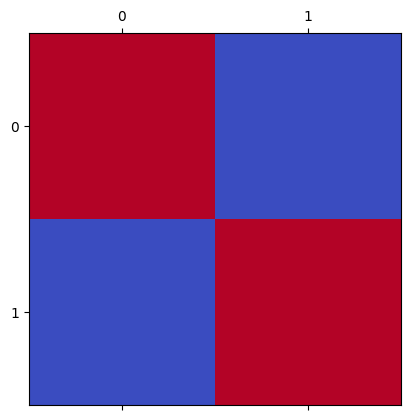

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Heatmap for Open and Close
print("Heatmap - Open vs Close Correlation")
plt.matshow(df[["open", "close"]].corr(), cmap="coolwarm")



Heatmap - high vs low Correlation


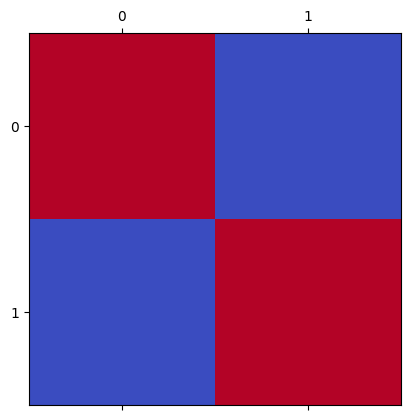

In [ ]:

# Heatmap for High and Low
print("Heatmap - high vs low Correlation")
plt.matshow(df[["high", "low"]].corr(), cmap="coolwarm")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

<ipython-input-73-86b3e100fd19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


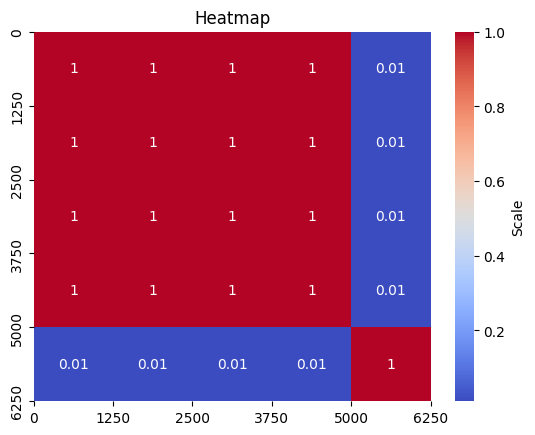

In [ ]:
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Adding scales to the x and y axes
ax.set_xticks(range(len(df.columns)))
ax.set_yticks(range(len(df.columns)))
ax.set_xticklabels([f'{i * 1250}' for i in range(len(df.columns))])  # Assuming each column represents 1250 units
ax.set_yticklabels([f'{i * 1250}' for i in range(len(df.columns))])  # Assuming each row represents 1250 units

# Adding title
plt.title('Heatmap')

# printing scale
cbar = ax.collections[0].colorbar
cbar.set_label('Scale')
# Display the plot
plt.show()

<ipython-input-57-6ea6120af75e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), cmap='coolwarm', figsize=(8, 6))


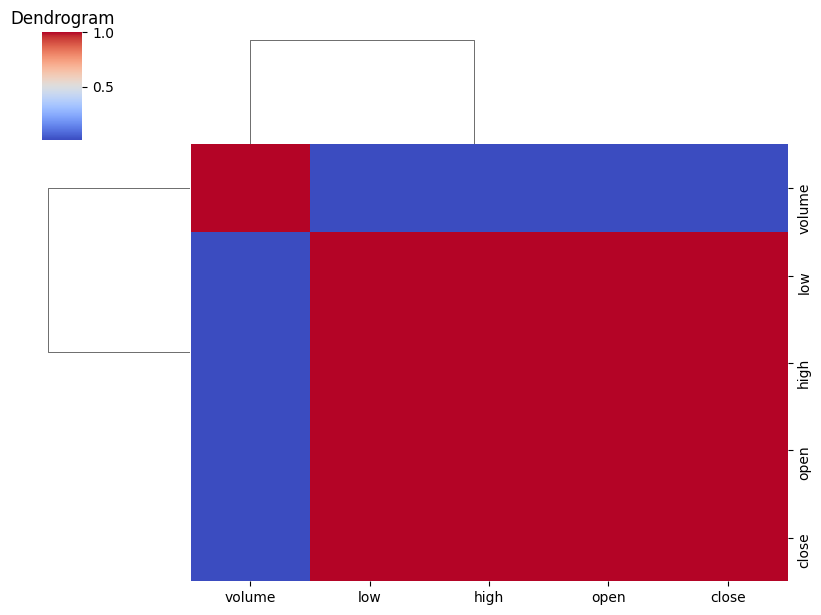

In [ ]:
# Dendrogram (for hierarchical clustering)
sns.clustermap(df.corr(), cmap='coolwarm', figsize=(8, 6))
plt.title('Dendrogram')
plt.show()

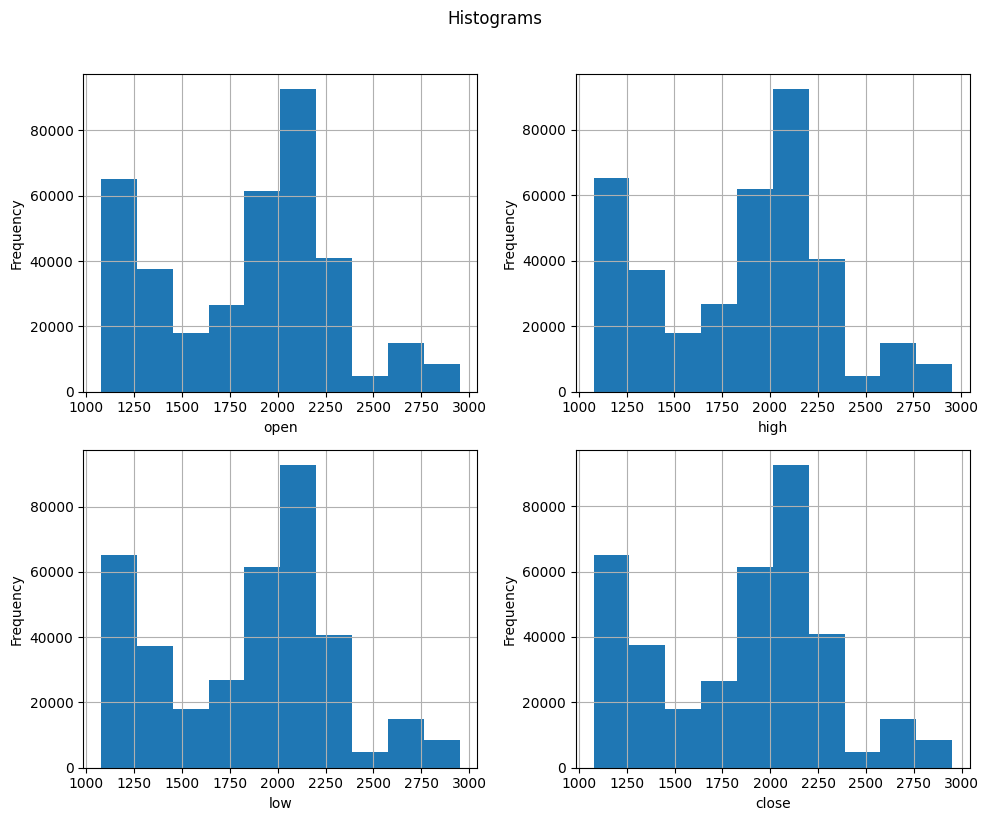

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Plot histograms for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, column in zip(axes.flatten(), df.select_dtypes(include='number').columns):
    df[column].hist(ax=ax)
    ax.set_xlabel(column)  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

plt.suptitle('Histograms', x=0.5, y=1.02)
plt.tight_layout()
plt.show()


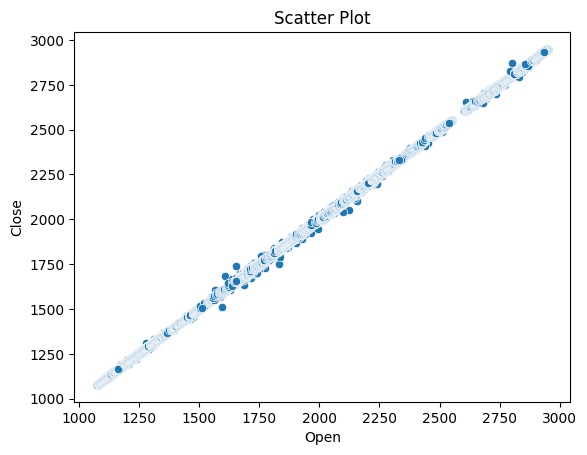

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Scatter Plot
sns.scatterplot(data=df, x='open', y='close')
plt.title('Scatter Plot')
plt.xlabel('Open')  # Set x-axis label
plt.ylabel('Close')  # Set y-axis label
plt.show()


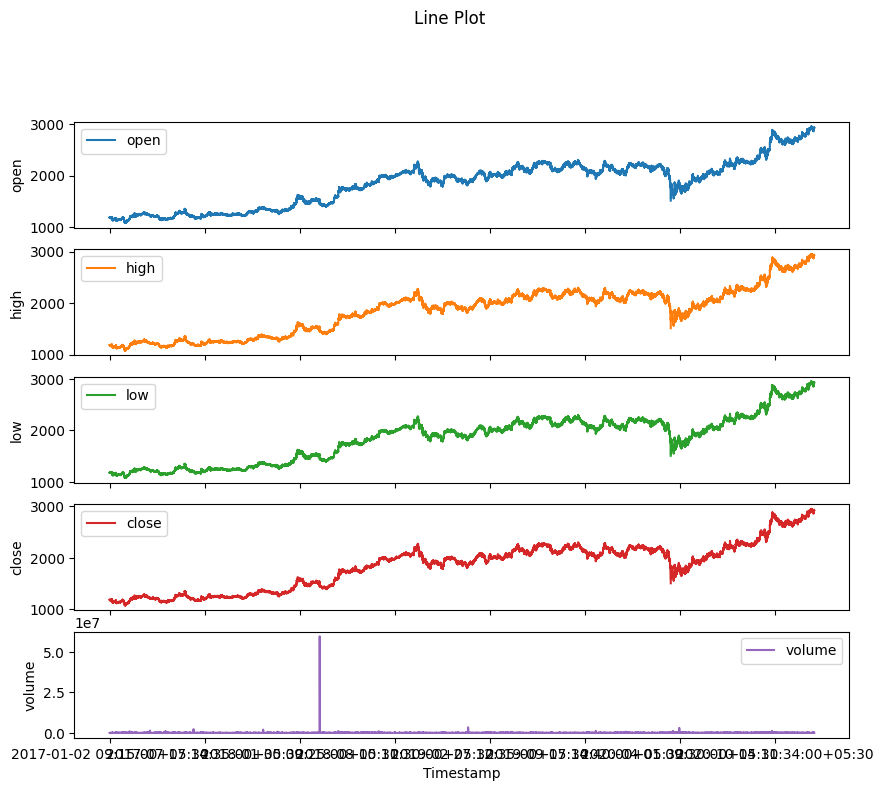

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Line Plot
axes = df.plot(x='timestamp', y=['open', 'high', 'low', 'close', 'volume'], subplots=True, figsize=(10, 8))

# Set axis labels for each subplot
for ax, column in zip(axes, df[['open', 'high', 'low', 'close', 'volume']]):
    ax.set_xlabel('Timestamp')  # Set x-axis label
    ax.set_ylabel(column)  # Set y-axis label

plt.suptitle('Line Plot', x=0.5, y=1.02)
plt.show()


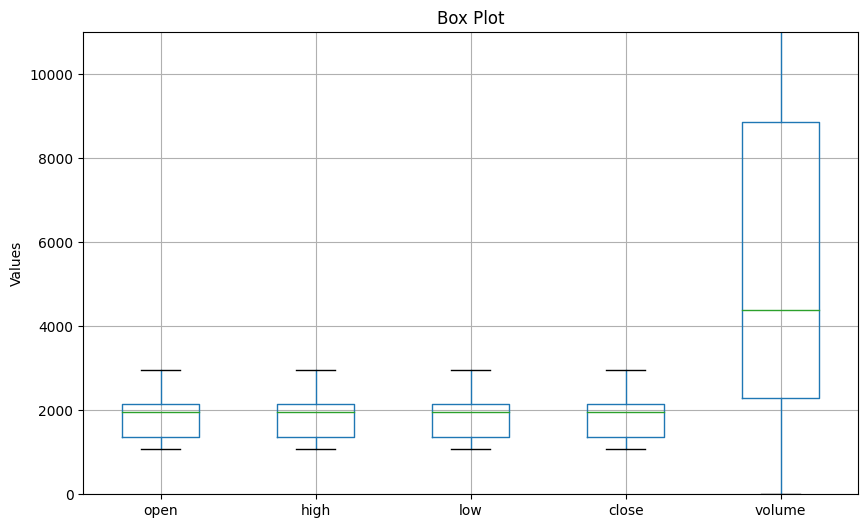

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Create a smaller figure
fig, ax = plt.subplots(figsize=(10, 6))

# Box Plot
df.boxplot(ax=ax)
ax.set_ylim(0, 11000) # Specify the axis to plot on
plt.title('Box Plot')

# Specify y-axis label
plt.ylabel('Values')  # Add y-axis label

# Show the plot
plt.show()


<ipython-input-62-cd92547e0e66>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['open'], shade=True)


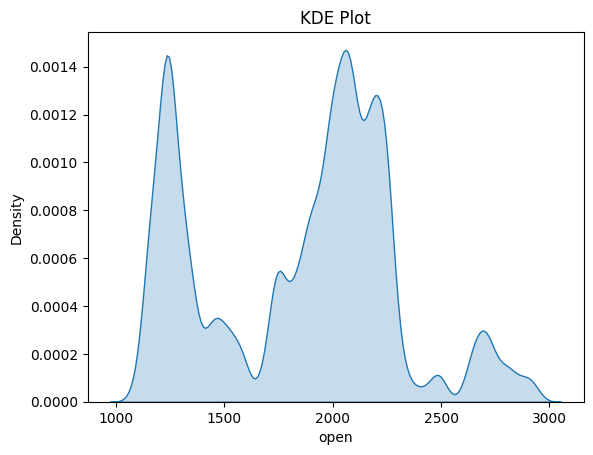

In [ ]:
# KDE Plot
sns.kdeplot(df['open'], shade=True)
plt.title('KDE Plot')
plt.show()

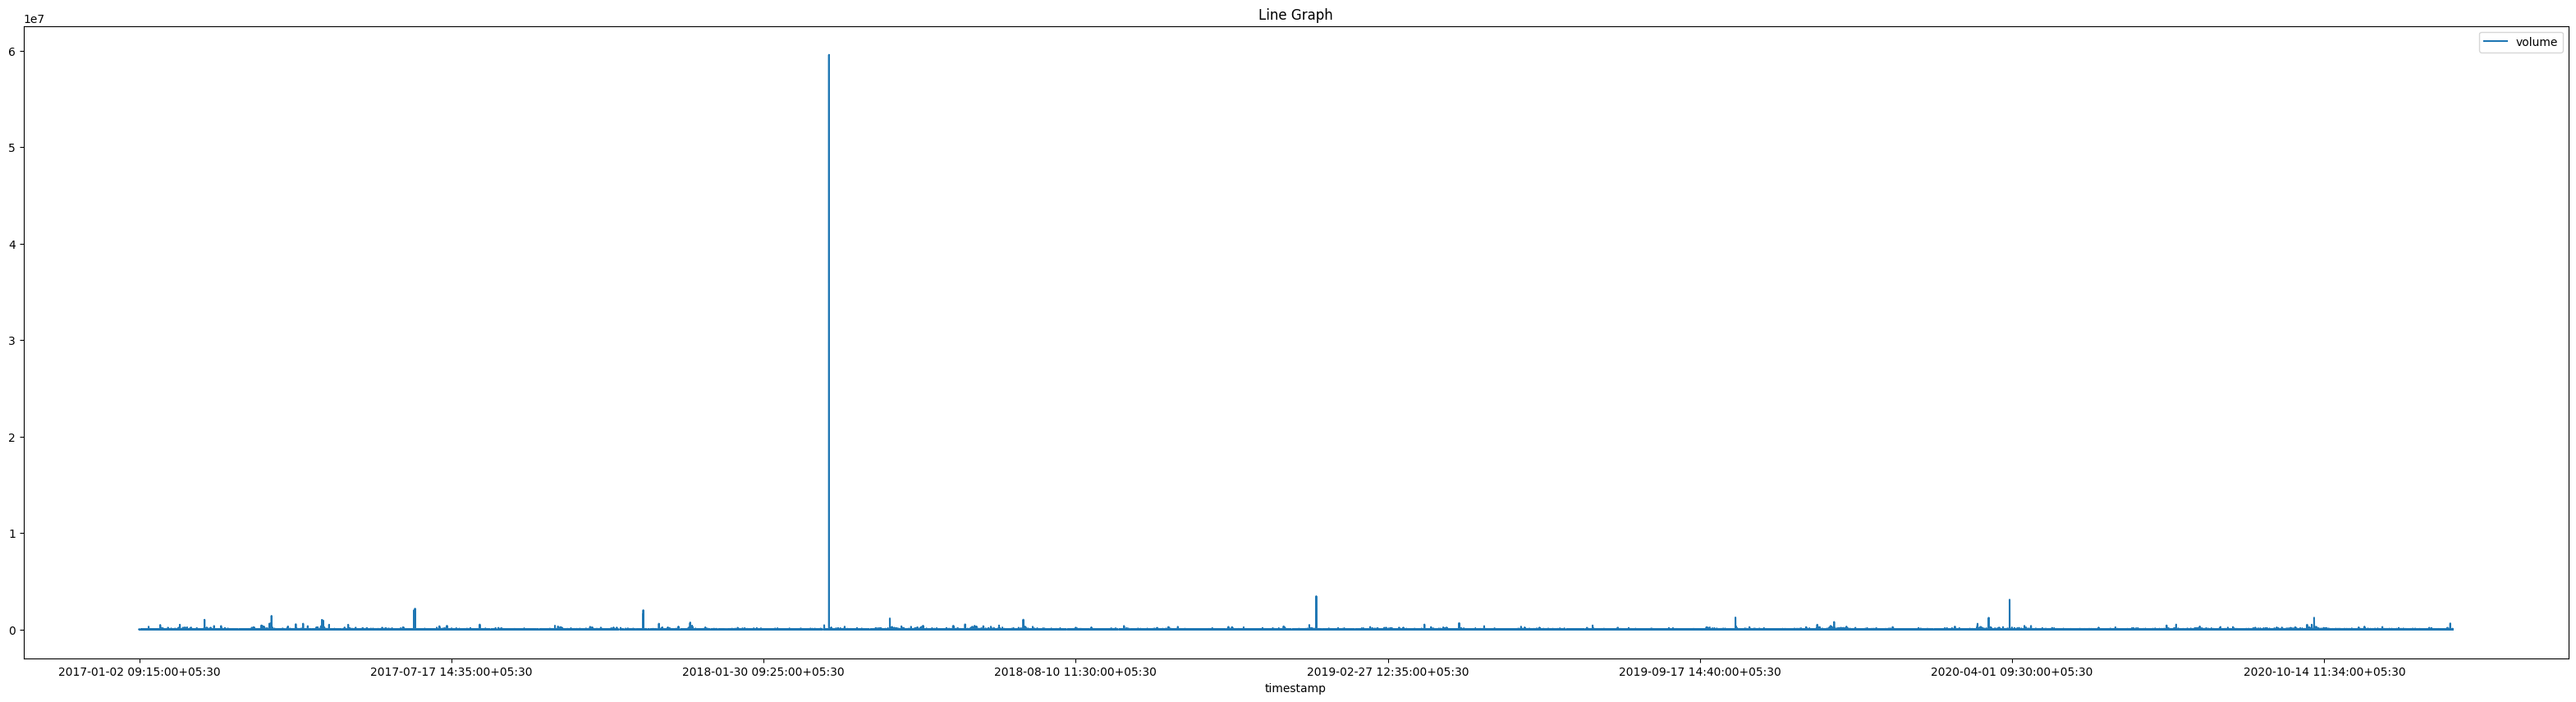

In [ ]:
# Line Graph
df.plot(x='timestamp', y='volume', figsize=(40, 10))
plt.title('Line Graph')
plt.show()


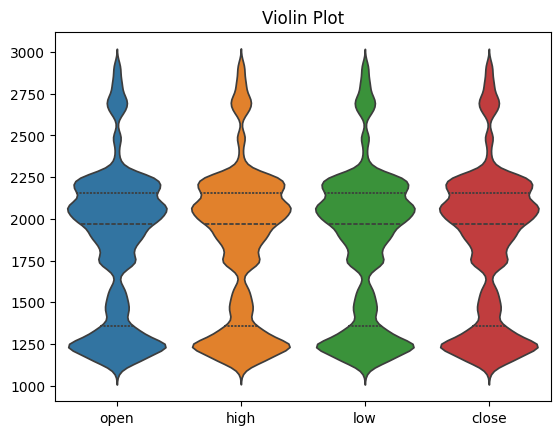

In [ ]:
# Violin Plot
sns.violinplot(data=df[['open', 'high', 'low', 'close']], inner='quartile')
plt.title('Violin Plot')
plt.show()

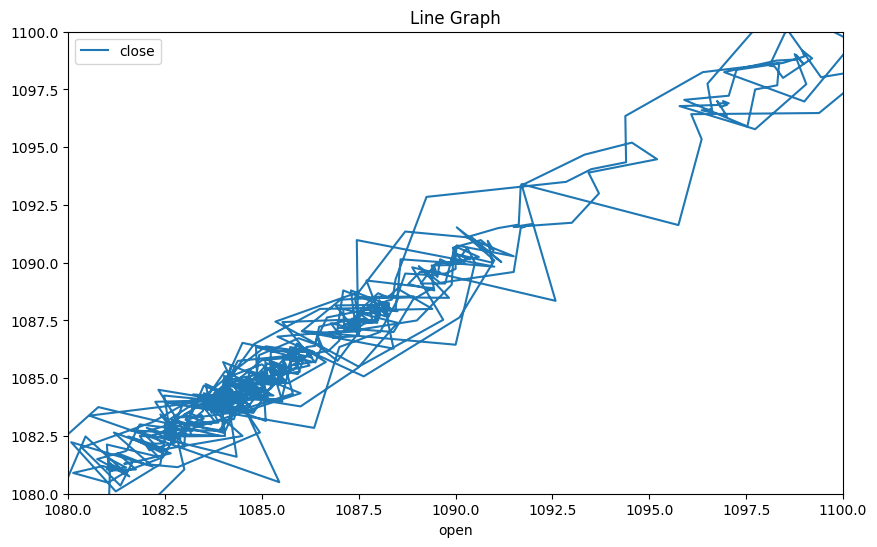

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting the data
ax = df.plot(x='open', y='close', figsize=(10, 6))

# Setting the x and y limits
ax.set_xlim(1080, 1100)
ax.set_ylim(1080, 1100)

# Adding title
plt.title('Line Graph')

# Display the plot
plt.show()


In [ ]:
# Setting the x and y limits
ax.set_xlim(1080, 1100)
ax.set_ylim(1080, 1100)

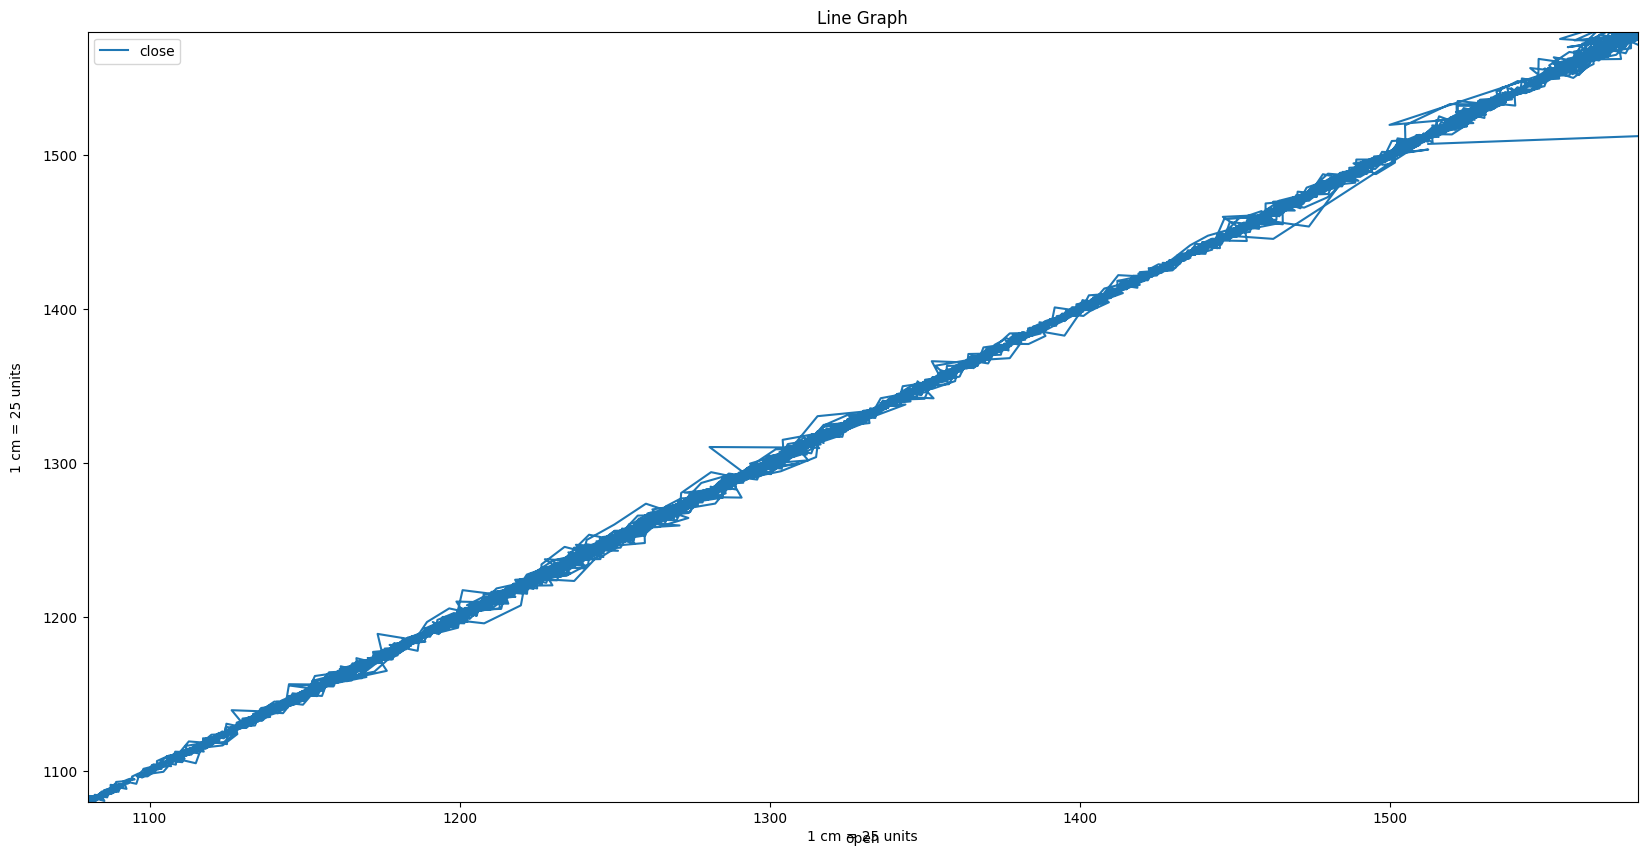

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting the data
ax = df.plot(x='open', y='close', figsize=(20, 10))

# Setting the x and y limits
ax.set_xlim(1080, 1100)
ax.set_ylim(1080, 1100)
# For example, if you want 1 cm to represent 10 units on both axes
# Calculate the range of units covered by 1 cm
units_per_cm = 25

# Calculate the range in data coordinates (assuming 1 cm = 10 units)
x_range = units_per_cm * (ax.get_xlim()[1] - ax.get_xlim()[0])
y_range = units_per_cm * (ax.get_ylim()[1] - ax.get_ylim()[0])

# Set the limits accordingly
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[0] + x_range)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[0] + y_range)

# Adding title
plt.title('Line Graph')

# Annotate x-axis scale
x_scale_annotation = f'1 cm = {units_per_cm} units'
ax.annotate(x_scale_annotation, xy=(0.5, -0.05), xycoords='axes fraction', ha='center')

# Annotate y-axis scale
y_scale_annotation = f'1 cm = {units_per_cm} units'
ax.annotate(y_scale_annotation, xy=(-0.05, 0.5), xycoords='axes fraction', va='center', rotation=90)

# Display the plot
plt.show()


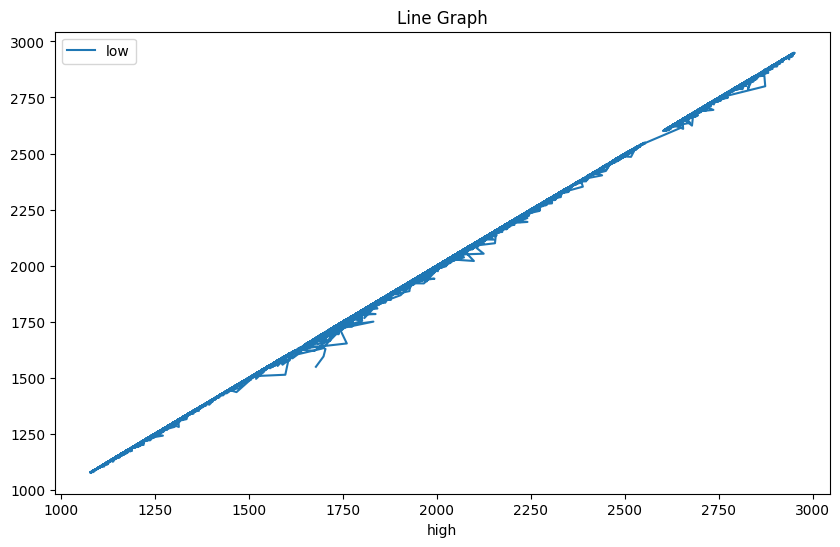

In [ ]:
df.plot(x='high', y='low', figsize=(10, 6))
plt.title('Line Graph')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


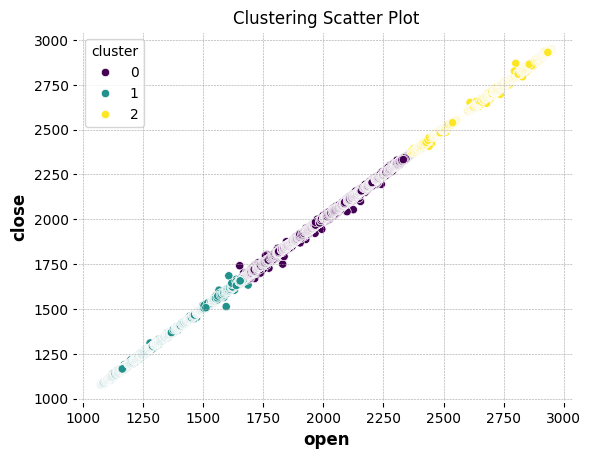

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with missing values
# Let's fill missing values with 0
df_filled = df.fillna(0)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df_filled[['open', 'close']])

# Plot clustering scatter plot
sns.scatterplot(data=df, x='open', y='close', hue='cluster', palette='viridis')
plt.title('Clustering Scatter Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


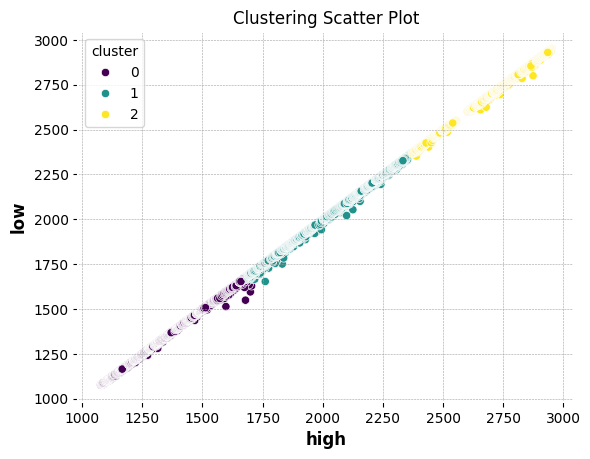

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with missing values
# Let's fill missing values with 0
df_filled = df.fillna(0)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df_filled[['high', 'low']])

# Plot clustering scatter plot
sns.scatterplot(data=df, x='high', y='low', hue='cluster', palette='viridis')
plt.title('Clustering Scatter Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


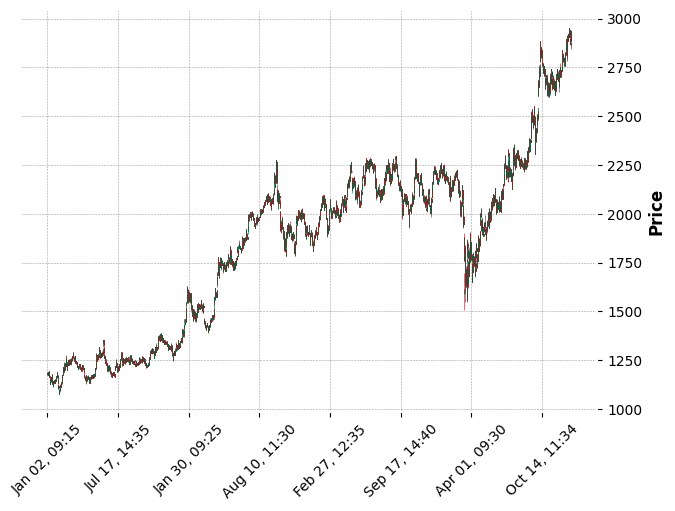

In [ ]:
import pandas as pd
import mplfinance as mpf

# Assuming df is your DataFrame with the 'timestamp' column
# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' column as the index of the DataFrame
df.set_index('timestamp', inplace=True)

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles')


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


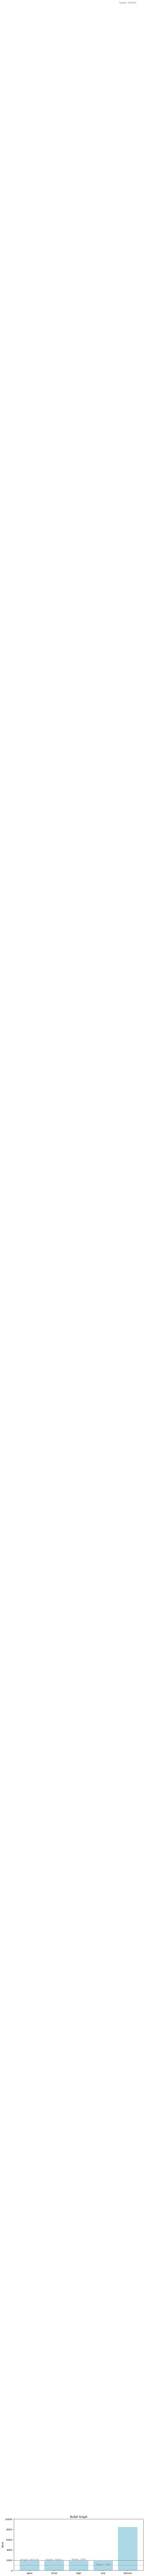

In [ ]:
import matplotlib.pyplot as plt

# Define data
categories = ['Open', 'Close', 'High', 'Low', 'Volume']
values = [df['open'].mean(), df['close'].mean(), df['high'].mean(), df['low'].mean(), df['volume'].mean()]
targets = [1935.85 , 1938.8, 2000, 1000, 500000]  # Example target values

# Create bullet graph
fig, ax = plt.subplots(figsize=(10, 4))  # Reducing the figure size to (10, 4)

# Plot bars
bars = ax.bar(categories, values, color='lightblue')

# Plot targets
for i, target in enumerate(targets):
    ax.axhline(target, color='gray', linestyle='--', linewidth=1)
    ax.text(i, target + 1, f'Target: {target}', ha='center', fontsize=10, color='gray')

# Customize axes
# Set x-axis limits
ax.set_ylim(0, 10000)  # Set y-axis limits
ax.set_title('Bullet Graph')
ax.set_ylabel('Value')

# Show plot
plt.show()


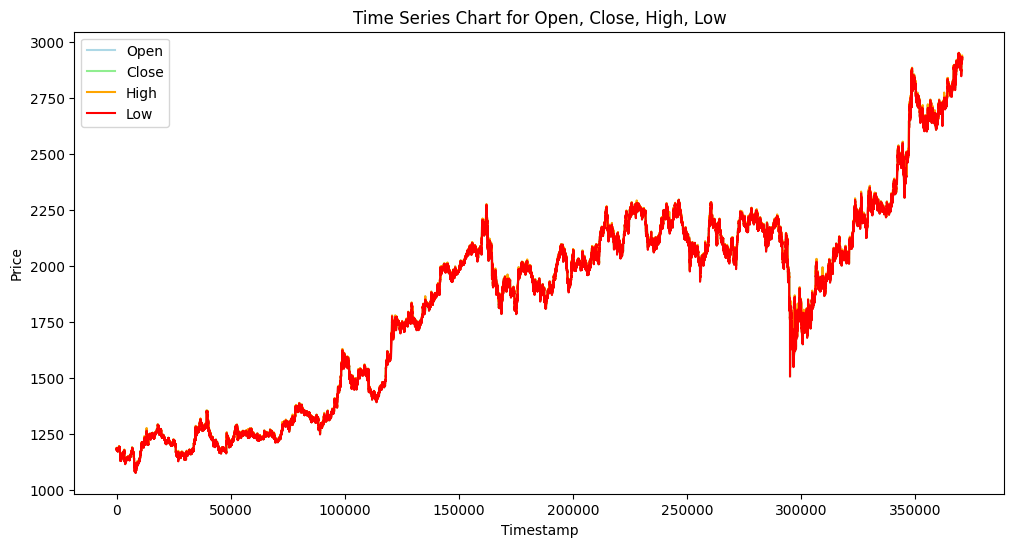

In [ ]:
import matplotlib.pyplot as plt

# Plotting Time Series Chart for 'open', 'close', 'high', 'low' columns
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['open'], label='Open', color='lightblue')
plt.plot(df.index, df['close'], label='Close', color='lightgreen')
plt.plot(df.index, df['high'], label='High', color='orange')
plt.plot(df.index, df['low'], label='Low', color='red')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for Open, Close, High, Low')
plt.legend()
plt.show()


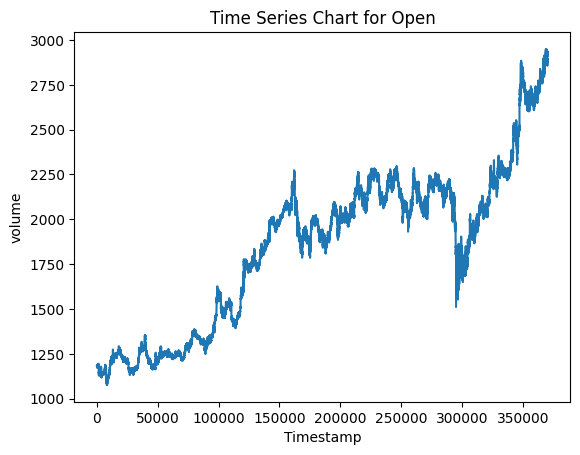

In [ ]:
# Time Series Charts (example for 'open' column)
plt.plot(df.index, df['open'])
plt.xlabel('Timestamp')
plt.ylabel('volume')
plt.title('Time Series Chart for Open')
plt.show()


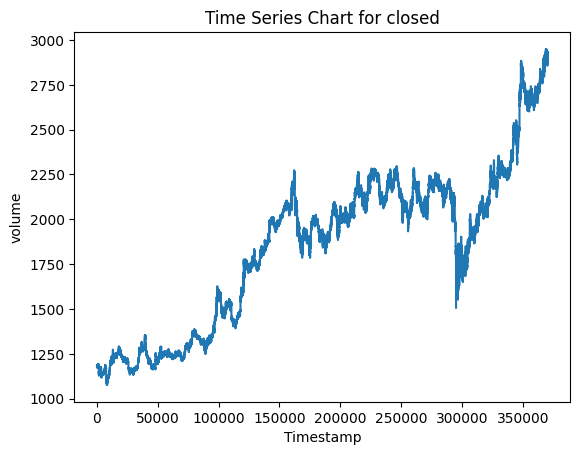

In [ ]:
# Time Series Charts (example for 'close' column)
plt.plot(df.index, df['close'])
plt.xlabel('Timestamp')
plt.ylabel('volume')
plt.title('Time Series Chart for closed')
plt.show()


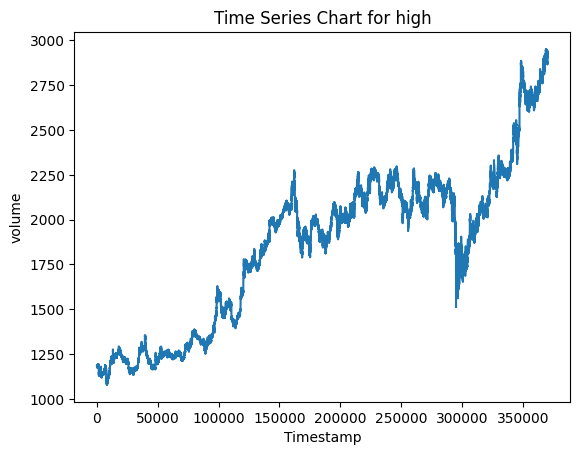

In [ ]:
# Time Series Charts (example for 'open' column)
plt.plot(df.index, df['high'])
plt.xlabel('Timestamp')
plt.ylabel('volume')
plt.title('Time Series Chart for high')
plt.show()


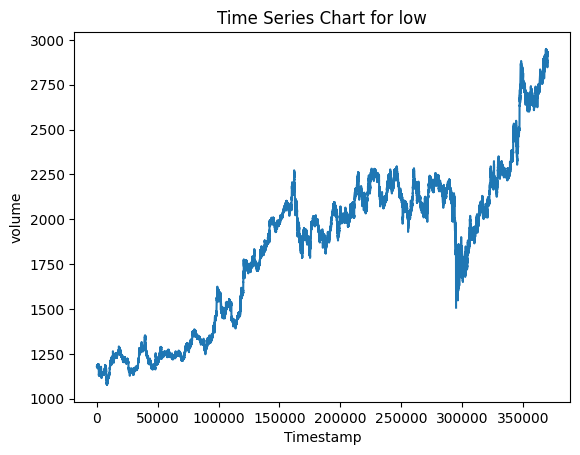

In [ ]:
# Time Series Charts (example for 'open' column)
plt.plot(df.index, df['low'])
plt.xlabel('Timestamp')
plt.ylabel('volume')
plt.title('Time Series Chart for low')
plt.show()


# exp 6

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population_mean = df['open'].mean()
population_deviation = df['open'].std()
n = 25  # Sample size
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first 25 rows
sample_mean = df['open'].head(15).mean()

# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for two-tailed test
critical_t_value_two_tailed = stats.t.ppf(1 - alpha/2, df=n-1)  # For two-tailed test

# Compare t-score with critical t-value for two-tailed test
if abs(t_score_two_tailed) < critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=n-1))  # Two-tailed test

# Define hypotheses for one-tailed test
H0_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for one-tailed test
t_score_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for one-tailed test
critical_t_value_one_tailed = stats.t.ppf(1 - alpha, df=n-1)  # For one-tailed test

# Compare t-score with critical t-value for one-tailed test
if t_score_one_tailed > critical_t_value_one_tailed:
    decision_one_tailed = "Reject H0"
else:
    decision_one_tailed = "Accept H0"

# Calculate p-value for one-tailed test
p_value_one_tailed = 1 - stats.t.cdf(t_score_one_tailed, df=n-1)  # One-tailed test

# Print results for two-tailed test
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on T-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

# Print results for one-tailed test
print("\nOne-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_one_tailed)
print(H1_one_tailed)
print("\nT-score:", t_score_one_tailed)
print("Critical T-value (one-tailed):", critical_t_value_one_tailed)
print("Decision based on T-test:", decision_one_tailed)
print("P-value:", p_value_one_tailed)


Two-Tailed Test:
Population Mean (μ): 1848.7058823719985
Sample Size (n): 25
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1181.6899999999998

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

T-score: -7.48259384624358
Critical T-value (two-tailed): 2.0638985616280205
Decision based on T-test: Accept H0
P-value: 1.0093132063460075e-07

One-Tailed Test:
Population Mean (μ): 1848.7058823719985
Sample Size (n): 25
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1181.6899999999998

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

T-score: -7.48259384624358
Critical T-value (one-tailed): 1.7108820799094275
Decision based on T-test: Accept H0
P-value: 0.99999994953

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Define population size and sample size
population_size = 30
sample_size = 20
alpha = 0.05  # Default value for alpha

# Calculate population mean and deviation from the first population_size entries
population_mean = df['open'].head(population_size).mean()
population_deviation = df['open'].head(population_size).std()

# Calculate sample mean from the first sample_size rows
sample_mean = df['open'].head(sample_size).mean()

# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(sample_size))

# Look up critical t-value for two-tailed test
critical_t_value_two_tailed = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # For two-tailed test

# Compare t-score with critical t-value for two-tailed test
if abs(t_score_two_tailed) < critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=sample_size-1))  # Two-tailed test

# Define hypotheses for one-tailed test
H0_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for one-tailed test
t_score_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(sample_size))

# Look up critical t-value for one-tailed test
critical_t_value_one_tailed = stats.t.ppf(1 - alpha, df=sample_size-1)  # For one-tailed test

# Compare t-score with critical t-value for one-tailed test
if t_score_one_tailed > critical_t_value_one_tailed:
    decision_one_tailed = "Reject H0"
else:
    decision_one_tailed = "Accept H0"

# Calculate p-value for one-tailed test
p_value_one_tailed = 1 - stats.t.cdf(t_score_one_tailed, df=sample_size-1)  # One-tailed test

# Print results for two-tailed test
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Population Size (N):", population_size)
print("Sample Size (n):", sample_size)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on T-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

# Print results for one-tailed test
print("\nOne-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Population Size (N):", population_size)
print("Sample Size (n):", sample_size)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_one_tailed)
print(H1_one_tailed)
print("\nT-score:", t_score_one_tailed)
print("Critical T-value (one-tailed):", critical_t_value_one_tailed)
print("Decision based on T-test:", decision_one_tailed)
print("P-value:", p_value_one_tailed)


Two-Tailed Test:
Population Mean (μ): 1182.304
Population Size (N): 30
Sample Size (n): 20
Population Deviation (σ): 2.5155455979115975
Alpha (level of significance): 0.05
Sample Mean: 1181.1560000000002

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

T-score: -2.0409139395451104
Critical T-value (two-tailed): 2.093024054408263
Decision based on T-test: Reject H0
P-value: 0.055400204563381905

One-Tailed Test:
Population Mean (μ): 1182.304
Population Size (N): 30
Sample Size (n): 20
Population Deviation (σ): 2.5155455979115975
Alpha (level of significance): 0.05
Sample Mean: 1181.1560000000002

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

T-score: -2.0409139395451104
Critical T-value (one-tailed): 1.729132811521367
Decision based on T-test: Acce

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Define population size and sample size
population_size = 30
sample_size = 20
alpha = 0.05  # Default value for alpha

# Calculate population mean and deviation from the first population_size entries
population_mean = df['open'].head(population_size).mean()
population_deviation = df['open'].head(population_size).std()

# Calculate sample mean from the first sample_size rows
sample_mean = df['open'].head(sample_size).mean()

# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(sample_size))

# Look up critical t-value for two-tailed test
critical_t_value_two_tailed = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # For two-tailed test

# Compare t-score with critical t-value for two-tailed test
if abs(t_score_two_tailed) < critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=sample_size-1))  # Two-tailed test

# Define hypotheses for one-tailed test
H0_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for one-tailed test
t_score_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(sample_size))

# Look up critical t-value for one-tailed test
critical_t_value_one_tailed = stats.t.ppf(1 - alpha, df=sample_size-1)  # For one-tailed test

# Compare t-score with critical t-value for one-tailed test
if t_score_one_tailed > critical_t_value_one_tailed:
    decision_one_tailed = "Reject H0"
else:
    decision_one_tailed = "Accept H0"

# Calculate p-value for one-tailed test
p_value_one_tailed = 1 - stats.t.cdf(t_score_one_tailed, df=sample_size-1)  # One-tailed test

# Print sample mean
print("Sample Mean:", sample_mean)

# Print results for two-tailed test
print("\nTwo-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Population Size (N):", population_size)
print("Sample Size (n):", sample_size)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on T-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

# Print results for one-tailed test
print("\nOne-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Population Size (N):", population_size)
print("Sample Size (n):", sample_size)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("\nHypotheses:")
print(H0_one_tailed)
print(H1_one_tailed)
print("\nT-score:", t_score_one_tailed)
print("Critical T-value (one-tailed):", critical_t_value_one_tailed)
print("Decision based on T-test:", decision_one_tailed)
print("P-value:", p_value_one_tailed)


Sample Mean: 1181.1560000000002

Two-Tailed Test:
Population Mean (μ): 1182.304
Population Size (N): 30
Sample Size (n): 20
Population Deviation (σ): 2.5155455979115975
Alpha (level of significance): 0.05

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

T-score: -2.0409139395451104
Critical T-value (two-tailed): 2.093024054408263
Decision based on T-test: Reject H0
P-value: 0.055400204563381905

One-Tailed Test:
Population Mean (μ): 1182.304
Population Size (N): 30
Sample Size (n): 20
Population Deviation (σ): 2.5155455979115975
Alpha (level of significance): 0.05

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

T-score: -2.0409139395451104
Critical T-value (one-tailed): 1.729132811521367
Decision based on T-test: Accept H0
P-value: 0.97229989771830

for large

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population_mean = df['open'].mean()
population_deviation = df['open'].std()
n = len(df)
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first 5 rows
sample_mean = df['open'].head(100000).mean()  # Take the mean of the 'open' column for the first 5 rows

# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate z-score for two-tailed test
z_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for two-tailed test
critical_z_value_two_tailed = stats.norm.ppf(1 - alpha/2)  # For two-tailed test

# Compare z-score with critical z-value for two-tailed test
if abs(z_score_two_tailed) < critical_z_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_score_two_tailed)))  # Two-tailed test

# Define hypotheses for one-tailed test
H0_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate z-score for one-tailed test
z_score_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for one-tailed test
critical_z_value_one_tailed = stats.norm.ppf(1 - alpha)  # For one-tailed test

# Compare z-score with critical z-value for one-tailed test
if z_score_one_tailed > critical_z_value_one_tailed:
    decision_one_tailed = "Reject H0"
else:
    decision_one_tailed = "Accept H0"

# Calculate p-value for one-tailed test
p_value_one_tailed = 1 - stats.norm.cdf(z_score_one_tailed)  # One-tailed test

# Print results for two-tailed test
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nZ-score:", z_score_two_tailed)
print("Critical Z-value (two-tailed):", critical_z_value_two_tailed)
print("Decision based on Z-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

# Print results for one-tailed test
print("\nOne-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_one_tailed)
print(H1_one_tailed)
print("\nZ-score:", z_score_one_tailed)
print("Critical Z-value (one-tailed):", critical_z_value_one_tailed)
print("Decision based on Z-test:", decision_one_tailed)
print("P-value:", p_value_one_tailed)


Two-Tailed Test:
Population Mean (μ): 1848.7058823719985
Sample Size (n): 370546
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1251.5325373

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

Z-score: -815.5816998735695
Critical Z-value (two-tailed): 1.959963984540054
Decision based on Z-test: Accept H0
P-value: 0.0

One-Tailed Test:
Population Mean (μ): 1848.7058823719985
Sample Size (n): 370546
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1251.5325373

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

Z-score: -815.5816998735695
Critical Z-value (one-tailed): 1.6448536269514722
Decision based on Z-test: Accept H0
P-value: 1.0


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/tcs dataset short.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population_mean = df['open'].mean()
population_deviation = df['open'].std()
n = int(input("Enter the number of rows to take as sample: "))
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()  # Take the mean of the 'open' column for the first nrows

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate z-score for two-tailed test
z_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-values for two-tailed test
critical_z_value_two_tailed = stats.norm.ppf(1 - alpha/2)  # For two-tailed test

# Compare z-score with critical z-values for two-tailed test
if abs(z_score_two_tailed) > critical_z_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_score_two_tailed)))  # Two-tailed test

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate z-score for left one-tailed test
z_score_left_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for left one-tailed test
critical_z_value_left_one_tailed = stats.norm.ppf(1 - alpha)  # For left one-tailed test

# Compare z-score with critical z-value for left one-tailed test
if z_score_left_one_tailed > critical_z_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = 1 - stats.norm.cdf(z_score_left_one_tailed)  # One-tailed test

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The sample mean is greater than or equal to the population mean (μ)"
H1_right_one_tailed = "Alternative Hypothesis: The sample mean is less than the population mean (μ)"

# Calculate z-score for right one-tailed test
z_score_right_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for right one-tailed test
critical_z_value_right_one_tailed = stats.norm.ppf(alpha)  # For right one-tailed test

# Compare z-score with critical z-value for right one-tailed test
if z_score_right_one_tailed < critical_z_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = stats.norm.cdf(z_score_right_one_tailed)  # One-tailed test

# Print results for all tests
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nZ-score:", z_score_two_tailed)
print("Critical Z-value (two-tailed):", critical_z_value_two_tailed)
print("Decision based on Z-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nZ-score:", z_score_left_one_tailed)
print("Critical Z-value (left one-tailed):", critical_z_value_left_one_tailed)
print("Decision based on Z-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nZ-score:", z_score_right_one_tailed)
print("Critical Z-value (right one-tailed):", critical_z_value_right_one_tailed)
print("Decision based on Z-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)


Enter the number of rows to take as sample: 8
Two-Tailed Test:
Population Mean (μ): 1894.2450000000001
Sample Size (n): 8
Population Deviation (σ): 642.8610500679323
Alpha (level of significance): 0.05
Sample Mean: 1647.2875

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

Z-score: -1.086550960873576
Critical Z-value (two-tailed): 1.959963984540054
Decision based on Z-test: Accept H0
P-value: 0.2772353075307761

Left One-Tailed Test:
Population Mean (μ): 1894.2450000000001
Sample Size (n): 8
Population Deviation (σ): 642.8610500679323
Alpha (level of significance): 0.05
Sample Mean: 1647.2875

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

Z-score: -1.086550960873576
Critical Z-value (left one-tailed): 1.6448536269514722
Decision based on Z-test: A

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/tcs dataset short.csv")

# Load the t-table from CSV
t_table_df = pd.read_csv("/content/t table.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population_mean = df['open'].mean()
population_deviation = df['open'].std()
n = int(input("Enter the number of rows to take as sample: "))
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()  # Take the mean of the 'open' column for the first nrows

# Degrees of freedom for t-distribution
df_t = n - 1

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-values for two-tailed test from t-table
critical_t_value_two_tailed = t_table_df.iloc[df_t][str(alpha/2)]

# Compare t-score with critical t-values for two-tailed test
if abs(t_score_two_tailed) > critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=df_t))  # Two-tailed test

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for left one-tailed test
t_score_left_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for left one-tailed test from t-table
critical_t_value_left_one_tailed = t_table_df.iloc[df_t][str(alpha)]

# Compare t-score with critical t-value for left one-tailed test
if t_score_left_one_tailed > critical_t_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = 1 - stats.t.cdf(t_score_left_one_tailed, df=df_t)  # One-tailed test

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The sample mean is greater than or equal to the population mean (μ)"
H1_right_one_tailed = "Alternative Hypothesis: The sample mean is less than the population mean (μ)"

# Calculate t-score for right one-tailed test
t_score_right_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for right one-tailed test from t-table
critical_t_value_right_one_tailed = t_table_df.iloc[df_t][str(1 - alpha)]

# Compare t-score with critical t-value for right one-tailed test
if t_score_right_one_tailed < critical_t_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = stats.t.cdf(t_score_right_one_tailed, df=df_t)  # One-tailed test

# Print results for all tests
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on t-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nT-score:", t_score_left_one_tailed)
print("Critical T-value (left one-tailed):", critical_t_value_left_one_tailed)
print("Decision based on t-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nT-score:", t_score_right_one_tailed)
print("Critical T-value (right one-tailed):", critical_t_value_right_one_tailed)
print("Decision based on t-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)


Enter the number of rows to take as sample: 8
Two-Tailed Test:
Population Mean (μ): 1894.2450000000001
Sample Size (n): 8
Population Deviation (σ): 642.8610500679323
Alpha (level of significance): 0.05
Sample Mean: 1647.2875

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

Z-score: -1.086550960873576
Critical Z-value (two-tailed): 1.959963984540054
Decision based on Z-test: Accept H0
P-value: 0.2772353075307761

Left One-Tailed Test:
Population Mean (μ): 1894.2450000000001
Sample Size (n): 8
Population Deviation (σ): 642.8610500679323
Alpha (level of significance): 0.05
Sample Mean: 1647.2875

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

Z-score: -1.086550960873576
Critical Z-value (left one-tailed): 1.6448536269514722
Decision based on Z-test: A

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population=int(input("Enter the number of rows to take as population: "))
population_mean = df['open'].head(population).mean()
population_deviation = df['open'].std()
n = int(input("Enter the number of rows to take as sample: "))
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()  # Take the mean of the 'open' column for the first nrows

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate z-score for two-tailed test
z_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-values for two-tailed test
critical_z_value_two_tailed = stats.norm.ppf(1 - alpha/2)  # For two-tailed test

# Compare z-score with critical z-values for two-tailed test
if abs(z_score_two_tailed) > critical_z_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_score_two_tailed)))  # Two-tailed test

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate z-score for left one-tailed test
z_score_left_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for left one-tailed test
critical_z_value_left_one_tailed = stats.norm.ppf(1 - alpha)  # For left one-tailed test

# Compare z-score with critical z-value for left one-tailed test
if z_score_left_one_tailed > critical_z_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = 1 - stats.norm.cdf(z_score_left_one_tailed)  # One-tailed test

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The sample mean is greater than or equal to the population mean (μ)"
H1_right_one_tailed = "Alternative Hypothesis: The sample mean is less than the population mean (μ)"

# Calculate z-score for right one-tailed test
z_score_right_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical z-value for right one-tailed test
critical_z_value_right_one_tailed = stats.norm.ppf(alpha)  # For right one-tailed test

# Compare z-score with critical z-value for right one-tailed test
if z_score_right_one_tailed < critical_z_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = stats.norm.cdf(z_score_right_one_tailed)  # One-tailed test

# Print results for all tests
print("Two-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nZ-score:", z_score_two_tailed)
print("Critical Z-value (two-tailed):", critical_z_value_two_tailed)
print("Decision based on Z-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nZ-score:", z_score_left_one_tailed)
print("Critical Z-value (left one-tailed):", critical_z_value_left_one_tailed)
print("Decision based on Z-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nZ-score:", z_score_right_one_tailed)
print("Critical Z-value (right one-tailed):", critical_z_value_right_one_tailed)
print("Decision based on Z-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)


Enter the number of rows to take as population: 29
Enter the number of rows to take as sample: 20
Two-Tailed Test:
Population Mean (μ): 1182.2324137931037
Sample Size (n): 20
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1181.1560000000002

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

Z-score: -0.010800410068322514
Critical Z-value (two-tailed): 1.959963984540054
Decision based on Z-test: Accept H0
P-value: 0.9913826870897557

Left One-Tailed Test:
Population Mean (μ): 1182.2324137931037
Sample Size (n): 20
Population Deviation (σ): 445.71167169981754
Alpha (level of significance): 0.05
Sample Mean: 1181.1560000000002

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

Z-score: -0.010800410068322514
Cr

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Load the t-table from CSV
t_table_df = pd.read_csv("/content/t table.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population = int(input("Enter the number of rows to take as population: "))
population_mean = df['open'].head(population).mean()
population_deviation = df['open'].std()
n = int(input("Enter the number of rows to take as sample: "))
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()  # Take the mean of the 'open' column for the first nrows

# Degrees of freedom for t-distribution
df_t = n - 1

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-values for two-tailed test from t-table
critical_t_value_two_tailed = t_table_df.iloc[df_t][str(alpha/2)]

# Compare t-score with critical t-values for two-tailed test
if abs(t_score_two_tailed) > critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=df_t))  # Two-tailed test

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for left one-tailed test
t_score_left_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for left one-tailed test from t-table
critical_t_value_left_one_tailed = t_table_df.iloc[df_t][str(alpha)]

# Compare t-score with critical t-value for left one-tailed test
if t_score_left_one_tailed > critical_t_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = 1 - stats.t.cdf(t_score_left_one_tailed, df=df_t)  # One-tailed test

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The sample mean is greater than or equal to the population mean (μ)"
H1_right_one_tailed = "Alternative Hypothesis: The sample mean is less than the population mean (μ)"

# Calculate t-score for right one-tailed test
t_score_right_one_tailed = (sample_mean - population_mean) / (population_deviation / np.sqrt(n))

# Look up critical t-value for right one-tailed test from t-table
critical_t_value_right_one_tailed = t_table_df.iloc[df_t][str(1 - alpha)]

# Compare t-score with critical t-value for right one-tailed test
if t_score_right_one_tailed < critical_t_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = stats.t.cdf(t_score_right_one_tailed, df=df_t)  # One-tailed test

# Print results for all tests
print("\nTwo-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on t-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nT-score:", t_score_left_one_tailed)
print("Critical T-value (left one-tailed):", critical_t_value_left_one_tailed)
print("Decision based on t-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Population Deviation (σ):", population_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nT-score:", t_score_right_one_tailed)
print("Critical T-value (right one-tailed):", critical_t_value_right_one_tailed)
print("Decision based on t-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)


Enter the number of rows to take as population: 20
Enter the number of rows to take as sample: 10

Two-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
sample Standard Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Decision based on t-test: Reject H0
T-score: 4.819921864617528
Critical T-value (two-tailed): 2.2621571627409915
P-value: 0.00094708085328854

Left One-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
sample Standard Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Decision based on t-test: Accept H0
T-score: 4.819921864617528
Critical T-value (left one-tailed): -1.8331129326536337
P-value: 0.9995264595733557

Right One-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
Sample Standard Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Decision based on t-test: Reject H0
T-score: 4.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Load the t-table from CSV
t_table_df = pd.read_csv("/content/t table.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population = int(input("Enter the number of rows to take as population: "))
population_mean = df['open'].head(population).mean()
sample_deviation = df['open'].head(n).std()
n = int(input("Enter the number of rows to take as sample: "))
alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()  # Take the mean of the 'open' column for the first nrows

# Degrees of freedom for t-distribution
df_t = n - 1

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The sample mean is equal to the population mean (μ)"
H1_two_tailed = "Alternative Hypothesis: The sample mean is not equal to the population mean (μ)"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Look up critical t-values for two-tailed test from t-table
critical_t_value_two_tailed = t_table_df.iloc[df_t][str(alpha/2)]

# Compare t-score with critical t-values for two-tailed test
if abs(t_score_two_tailed) > critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=df_t))  # Two-tailed test

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The sample mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The sample mean is greater than the population mean (μ)"

# Calculate t-score for left one-tailed test
t_score_left_one_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Look up critical t-value for left one-tailed test from t-table
critical_t_value_left_one_tailed = t_table_df.iloc[df_t][str(alpha)]

# Compare t-score with critical t-value for left one-tailed test
if t_score_left_one_tailed > critical_t_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = 1 - stats.t.cdf(t_score_left_one_tailed, df=df_t)  # One-tailed test

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The sample mean is greater than or equal to the population mean (μ)"
H1_right_one_tailed = "Alternative Hypothesis: The sample mean is less than the population mean (μ)"

# Calculate t-score for right one-tailed test
t_score_right_one_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Look up critical t-value for right one-tailed test from t-table
critical_t_value_right_one_tailed = t_table_df.iloc[df_t][str(1 - alpha)]

# Compare t-score with critical t-value for right one-tailed test
if t_score_right_one_tailed < critical_t_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = stats.t.cdf(t_score_right_one_tailed, df=df_t)  # One-tailed test

# Print results for all tests
print("\nTwo-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on t-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nT-score:", t_score_left_one_tailed)
print("Critical T-value (left one-tailed):", critical_t_value_left_one_tailed)
print("Decision based on t-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nT-score:", t_score_right_one_tailed)
print("Critical T-value (right one-tailed):", critical_t_value_right_one_tailed)
print("Decision based on t-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)


Enter the number of rows to take as population: 20
Enter the number of rows to take as sample: 10

Two-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
Sample Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Hypotheses:
Null Hypothesis: The sample mean is equal to the population mean (μ)
Alternative Hypothesis: The sample mean is not equal to the population mean (μ)

T-score: 4.819921864617528
Critical T-value (two-tailed): 2.2621571627409915
Decision based on t-test: Reject H0
P-value: 0.00094708085328854

Left One-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
Sample Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Hypotheses:
Null Hypothesis: The sample mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The sample mean is greater than the population mean (μ)

T-score: 4.819921864617528
Critical T-value (left one-tailed): -1.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Assuming the dataset already contains the necessary columns: timestamp, open, high, low, close, volume

# Calculate population parameters
population = int(input("Enter the number of rows to take as population: "))
population_mean = df['open'].head(population).mean()

n = int(input("Enter the number of rows to take as sample: "))

alpha = 0.05  # Default value for alpha

# Calculate sample mean from the first n rows
sample_mean = df['open'].head(n).mean()
sample_deviation = df['open'].head(n).std()

# Degrees of freedom for t-distribution
df_t = n - 1

# Two-tailed test
# Define hypotheses for two-tailed test
H0_two_tailed = "Null Hypothesis: The population mean (μ) is equal to 1181.15"
H1_two_tailed = "Alternative Hypothesis: The the population mean (μ) is not equal to 1181.15"

# Calculate t-score for two-tailed test
t_score_two_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Calculate critical t-value for two-tailed test
critical_t_value_two_tailed = stats.t.ppf(1 - alpha / 2, df=df_t)

# Compare t-score with critical t-value for two-tailed test
if abs(t_score_two_tailed) > critical_t_value_two_tailed:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Accept H0"

# Calculate p-value for two-tailed test
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_score_two_tailed), df=df_t))

# Left one-tailed test
# Define hypotheses for left one-tailed test
H0_left_one_tailed = "Null Hypothesis: The population_mean is less than or equal to the population mean (μ)"
H1_left_one_tailed = "Alternative Hypothesis: The population_mean is greater than the population mean (μ)"

# Calculate t-score for left one-tailed test
t_score_left_one_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Calculate critical t-value for left one-tailed test
critical_t_value_left_one_tailed = stats.t.ppf(alpha, df=df_t)

# Compare t-score with critical t-value for left one-tailed test
if t_score_left_one_tailed > critical_t_value_left_one_tailed:
    decision_left_one_tailed = "Reject H0"
else:
    decision_left_one_tailed = "Accept H0"

# Calculate p-value for left one-tailed test
p_value_left_one_tailed = stats.t.cdf(t_score_left_one_tailed, df=df_t)

# Right one-tailed test
# Define hypotheses for right one-tailed test
H0_right_one_tailed = "Null Hypothesis: The population_mean is greater than or equal to 1181.15"
H1_right_one_tailed = "Alternative Hypothesis: The population_mean is less than 1181.15"

# Calculate t-score for right one-tailed test
t_score_right_one_tailed = (sample_mean - population_mean) / (sample_deviation / np.sqrt(n))

# Calculate critical t-value for right one-tailed test
critical_t_value_right_one_tailed = stats.t.ppf(1 - alpha, df=df_t)

# Compare t-score with critical t-value for right one-tailed test
if t_score_right_one_tailed > critical_t_value_right_one_tailed:
    decision_right_one_tailed = "Reject H0"
else:
    decision_right_one_tailed = "Accept H0"

# Calculate p-value for right one-tailed test
p_value_right_one_tailed = 1 - stats.t.cdf(t_score_right_one_tailed, df=df_t)

# Print results for all tests
print("\nTwo-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_two_tailed)
print(H1_two_tailed)
print("\nT-score:", t_score_two_tailed)
print("Critical T-value (two-tailed):", critical_t_value_two_tailed)
print("Decision based on t-test:", decision_two_tailed)
print("P-value:", p_value_two_tailed)

print("\nLeft One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_left_one_tailed)
print(H1_left_one_tailed)
print("\nT-score:", t_score_left_one_tailed)
print("Critical T-value (left one-tailed):", critical_t_value_left_one_tailed)
print("Decision based on t-test:", decision_left_one_tailed)
print("P-value:", p_value_left_one_tailed)

print("\nRight One-Tailed Test:")
print("Population Mean (μ):", population_mean)
print("Sample Size (n):", n)
print("Sample Deviation (σ):", sample_deviation)
print("Alpha (level of significance):", alpha)
print("Sample Mean:", sample_mean)
print("\nHypotheses:")
print(H0_right_one_tailed)
print(H1_right_one_tailed)
print("\nT-score:", t_score_right_one_tailed)
print("Critical T-value (right one-tailed):", critical_t_value_right_one_tailed)
print("Decision based on t-test:", decision_right_one_tailed)
print("P-value:", p_value_right_one_tailed)

Enter the number of rows to take as population: 20
Enter the number of rows to take as sample: 10

Two-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
Sample Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Hypotheses:
Null Hypothesis: The population mean (μ) is equal to 1181.15
Alternative Hypothesis: The the population mean (μ) is not equal to 1181.15

T-score: 4.819921864617528
Critical T-value (two-tailed): 2.2621571627409915
Decision based on t-test: Reject H0
P-value: 0.00094708085328854

Left One-Tailed Test:
Population Mean (μ): 1181.1560000000002
Sample Size (n): 10
Sample Deviation (σ): 1.21572520652396
Alpha (level of significance): 0.05
Sample Mean: 1183.009

Hypotheses:
Null Hypothesis: The population_mean is less than or equal to the population mean (μ)
Alternative Hypothesis: The population_mean is greater than the population mean (μ)

T-score: 4.819921864617528
Critical T-value (left one-tailed): -1.8331

exp 3 updated

In [ ]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('/content/tcs dataset short.csv')

# Calculate midpoint for x and y
df['x_midpoint'] = (df['open'] + df['close']) / 2
df['y_midpoint'] = (df['open'] + df['close']) / 2

# Calculate differences for dx and dy
df['dx'] = df['open'] - df['open'].mean()
df['dy'] = df['close'] - df['open'].mean()

# Set initial frequency to 4
df['initial_frequency'] = df.groupby(['x_midpoint', 'y_midpoint']).size().reset_index(name='Frequency')

# Calculate other required columns
df['fx'] = df['frequency']
df['fxdx'] = df['fx'] * df['dx']
df['dx^2'] = df['dx'] ** 2
df['fy'] = df['frequency']
df['fydx'] = df['fy'] * df['dy']
df['dy^2'] = df['dy'] ** 2

# Create bins for x and y
bins = pd.IntervalIndex.from_tuples([(1100, 1200), (1300, 1400), (1800, 1900), (2100, 2200), (2800, 2900)], closed='both')
df['x_bin'] = pd.cut(df['open'], bins)
df['y_bin'] = pd.cut(df['close'], bins)


# Save the converted dataframe to a new CSV file
df.to_csv('correlations.csv', index=False)

# Print the updated CSV file
print(df)


                   timestamp     open     high      low    close  volume  \
0  2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50    8970   
1  2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48    5538   
2  2018-01-01 09:15:00+05:30  1341.70  1347.40  1341.70  1342.50    6912   
3  2018-01-01 09:16:00+05:30  1342.50  1342.50  1337.30  1337.30    7408   
4  2019-01-01 09:15:00+05:30  1896.00  1904.60  1896.00  1898.55   12338   
5  2019-01-01 09:16:00+05:30  1899.05  1899.80  1893.95  1897.20   12827   
6  2020-01-01 09:15:00+05:30  2168.00  2174.90  2165.00  2165.00   26750   
7  2020-01-01 09:16:00+05:30  2164.05  2166.45  2161.85  2161.85   16395   
8  2021-01-01 09:15:00+05:30  2880.00  2887.00  2880.00  2884.00   34423   
9  2021-01-01 09:16:00+05:30  2884.15  2888.75  2882.00  2887.50   27194   

   x_midpoint  y_midpoint       dx       dy  initial_frequency  fx     fxdx  \
0    1183.500    1183.500 -710.745 -710.745                  4  40 -28429.8   
1    

In [ ]:
sum_fx = df['fx'].sum()
sum_fy = df['fy'].sum()
sum_fxdxdy= (df['fx'] *df['dx'] * df['dy']).sum().sum()
sum_fxdx = df['fxdx'].sum()
sum_fydy = df['fydy'].sum()
sum_fxdx^2 = (df['fx'] * df['dx^2']).sum()
sum_fydy^2 = (df['fx'] * df['dy^2']).sum()

sum_fx: 400
sum_fy: 400
sum_fxdxdy: 268000000
sum_fxdx: 718900
sum_fydy: 718900
sum_fxdx^2: 122800000
sum_fydy^2: 122800000


In [ ]:
# Calculate numerator and denominator for correlation
numerator = (sum_fx['fxdx'].sum() * sum_fy['dy'].sum()) - (sum_fx['dx'].sum() * sum_fy['fydx'].sum())
denominator = np.sqrt(((sum_fx['fxdx']**2).sum() - ((sum_fx['fxdx'].sum())**2) / len(sum_fx)) * ((sum_fy['fydx']**2).sum() - ((sum_fy['fydx'].sum())**2) / len(sum_fy)))

# Calculate correlation
pearson_corr = numerator / denominator

print("Pearson correlation coefficient:", pearson_corr)


Pearson correlation coefficient: 1.0


exp 7 unsupervised knn

Indices of anomalies/outliers: [8, 9]


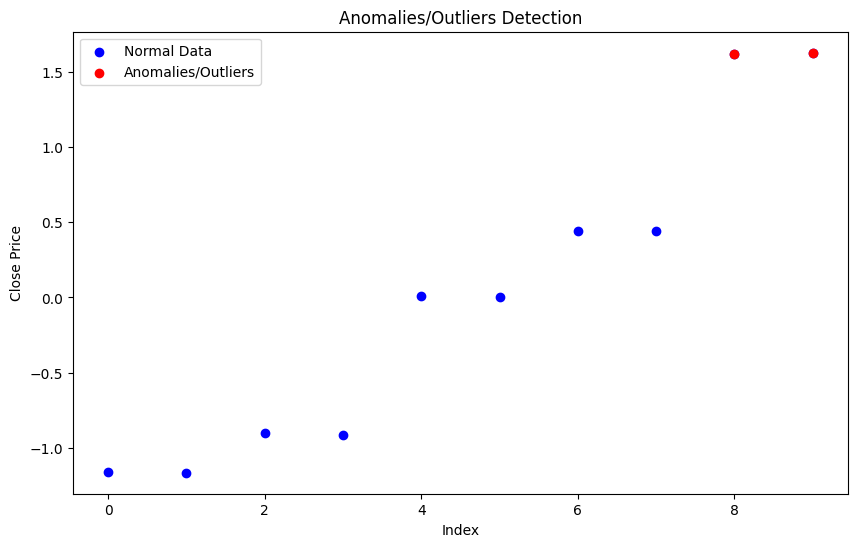

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs dataset short.csv")

# Assuming 'timestamp' column is in string format, convert it to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Selecting numerical features for anomaly detection
features = ['open', 'high', 'low', 'close', 'volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 5

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn_model.fit(data[features])

# Calculate distances to k nearest neighbors for each data point
distances, indices = knn_model.kneighbors()

# Calculate average distance to k nearest neighbors for each data point
average_distances = distances.mean(axis=1)

# Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
threshold = 2.0

# Identify anomalies/outliers based on the threshold
anomalies_indices = data.index[average_distances > threshold].tolist()

# Print indices of anomalies/outliers
print("Indices of anomalies/outliers:", anomalies_indices)

# Plotting anomalies/outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['close'], label='Normal Data', color='blue')
plt.scatter(anomalies_indices, data.loc[anomalies_indices]['close'], label='Anomalies/Outliers', color='red')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Anomalies/Outliers Detection')
plt.legend()
plt.show()


Indices of anomalies/outliers: [8, 9]


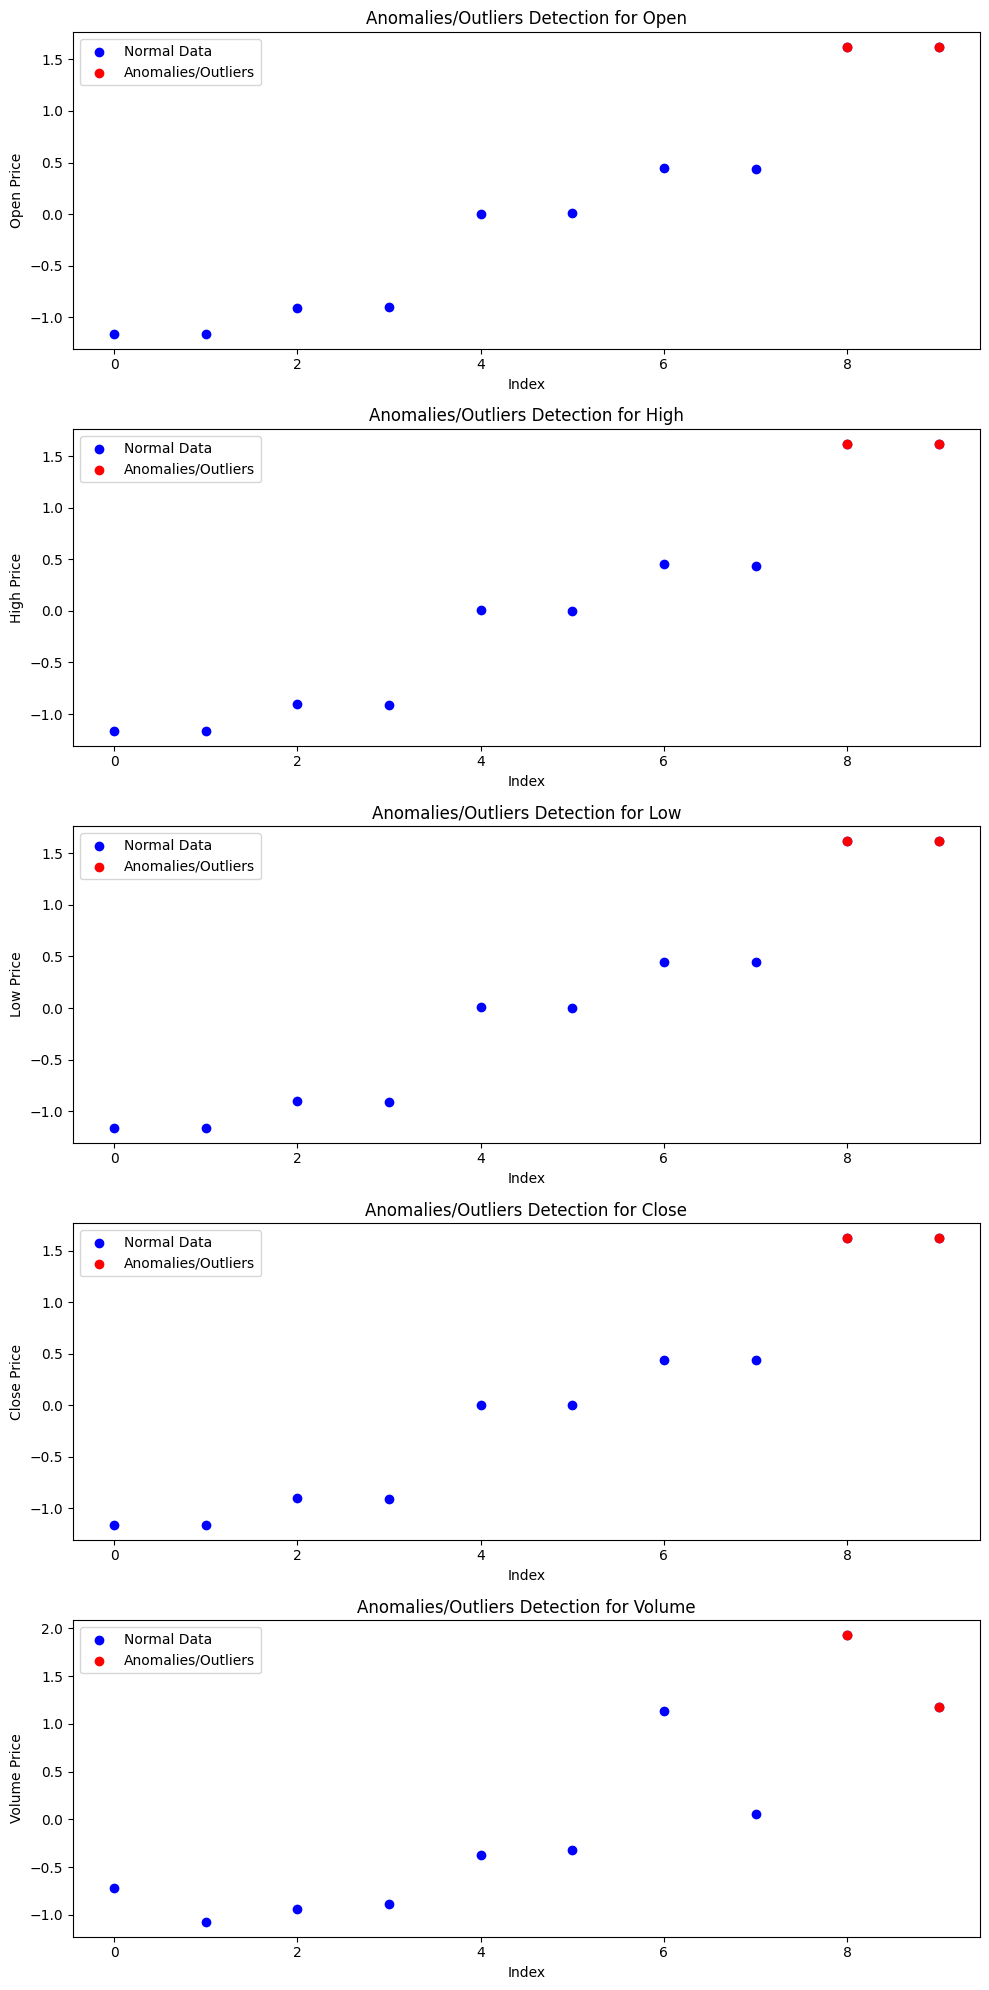

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs dataset short.csv")

# Selecting numerical features for anomaly detection
features = ['open', 'high', 'low', 'close', 'volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 5

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn_model.fit(data[features])

# Calculate distances to k nearest neighbors for each data point
distances, indices = knn_model.kneighbors()

# Calculate average distance to k nearest neighbors for each data point
average_distances = distances.mean(axis=1)

# Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
threshold = 2.0

# Identify anomalies/outliers based on the threshold
anomalies_indices = data.index[average_distances > threshold].tolist()

# Print indices of anomalies/outliers
print("Indices of anomalies/outliers:", anomalies_indices)

# Plotting anomalies/outliers for all features
fig, axs = plt.subplots(len(features), 1, figsize=(10, len(features)*4))

for i, feature in enumerate(features):
    axs[i].scatter(data.index, data[feature], label='Normal Data', color='blue')
    axs[i].scatter(anomalies_indices, data.loc[anomalies_indices][feature], label='Anomalies/Outliers', color='red')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(feature.capitalize() + ' Price')
    axs[i].set_title('Anomalies/Outliers Detection for ' + feature.capitalize())
    axs[i].legend()

plt.tight_layout()
plt.show()


Outliers for open: [21202, 80714, 110490, 110501, 141615, 188536, 299587, 348361]


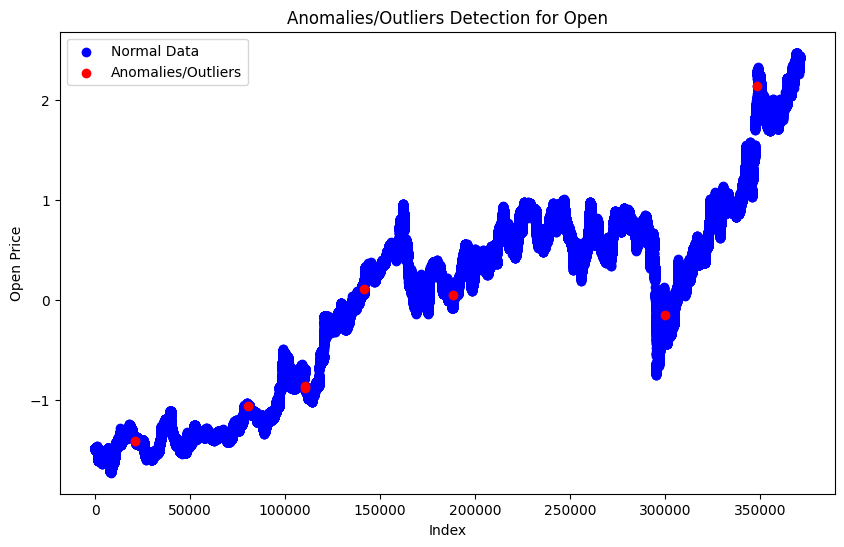

Outliers for high: [21202, 80714, 110490, 110501, 141615, 188536, 299587, 348361]


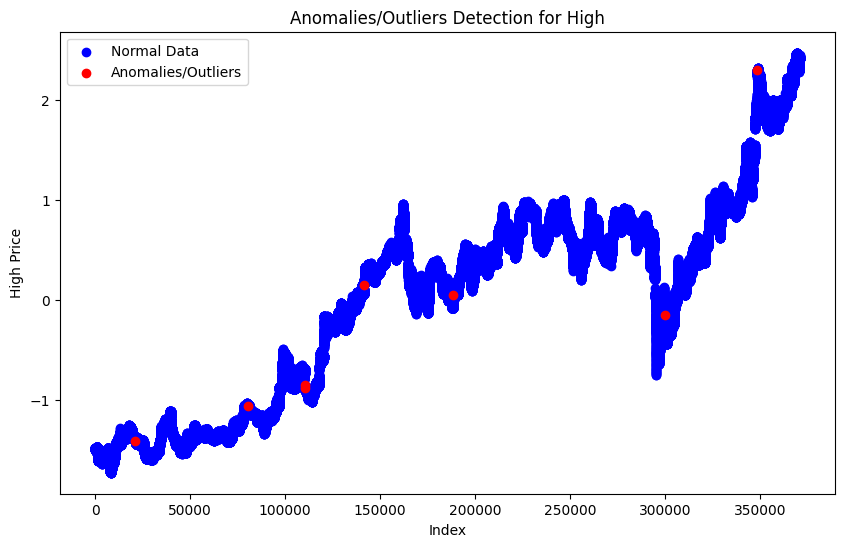

Outliers for low: [21202, 80714, 110490, 110501, 141615, 188536, 299587, 348361]


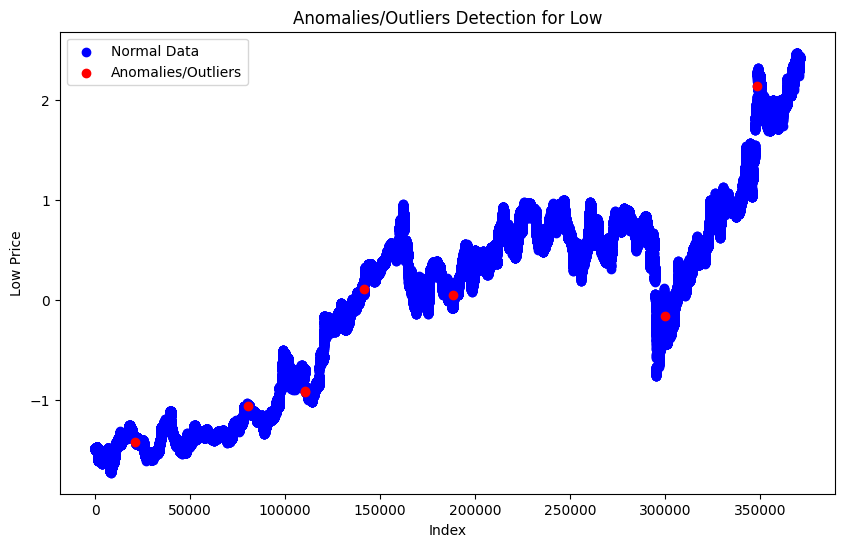

Outliers for close: [21202, 80714, 110490, 110501, 141615, 188536, 299587, 348361]


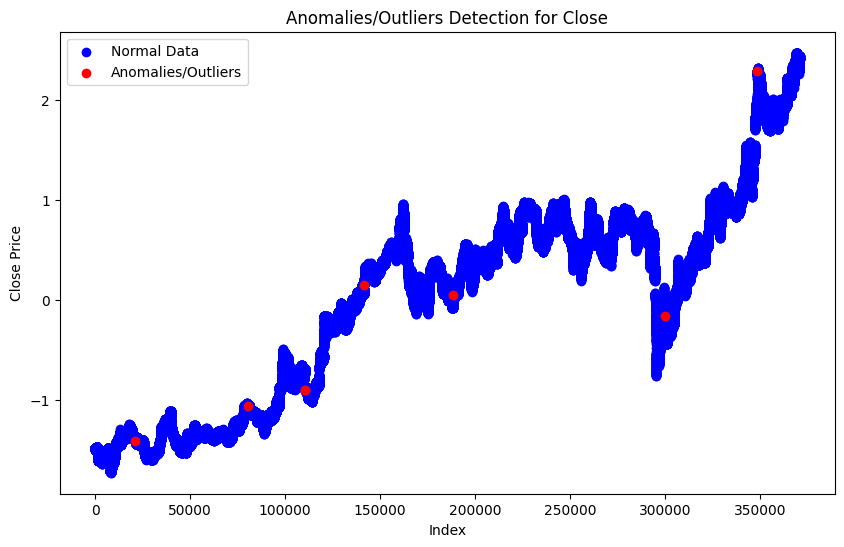

Outliers for volume: [21202, 80714, 110490, 110501, 141615, 188536, 299587, 348361]


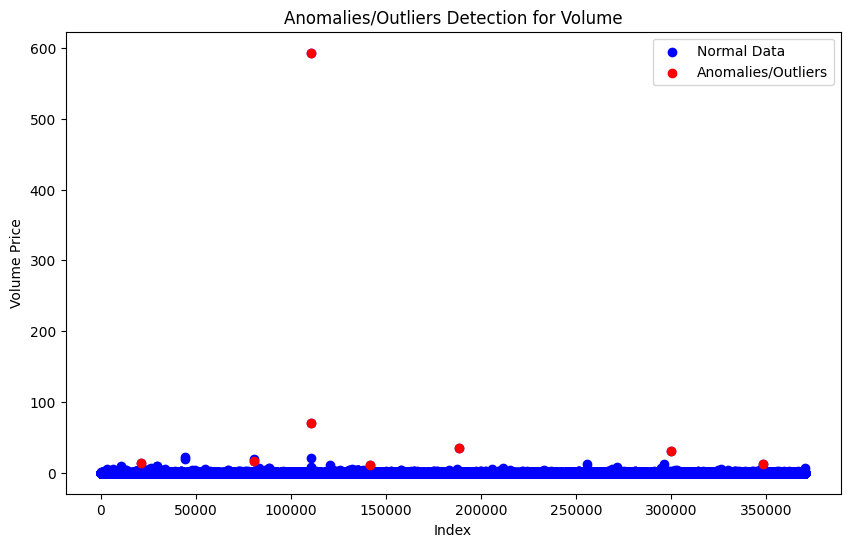

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs_clean_data.csv")

# Selecting numerical features for anomaly detection
features = ['open', 'high', 'low', 'close', 'volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 2

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn_model.fit(data[features])

# Calculate distances to k nearest neighbors for each data point
distances, indices = knn_model.kneighbors()

# Calculate average distance to k nearest neighbors for each data point
average_distances = distances.mean(axis=1)

# Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
threshold = 2.0

# Identify outliers for each feature based on the threshold
outliers_indices = {feature: data.index[average_distances > threshold].tolist() for feature in features}

# Print outliers and plot graphs
for feature in features:
    print(f"Outliers for {feature}: {outliers_indices[feature]}")

    # Plotting anomalies/outliers for the feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[feature], label='Normal Data', color='blue')
    plt.scatter(outliers_indices[feature], data.loc[outliers_indices[feature]][feature], label='Anomalies/Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(feature.capitalize() + ' Price')
    plt.title('Anomalies/Outliers Detection for ' + feature.capitalize())
    plt.legend()
    plt.show()


Outliers for open: [21202, 44035, 44188, 80714, 80750, 110490, 110491, 110501, 141615, 188536, 255675, 296241, 299587, 348361]


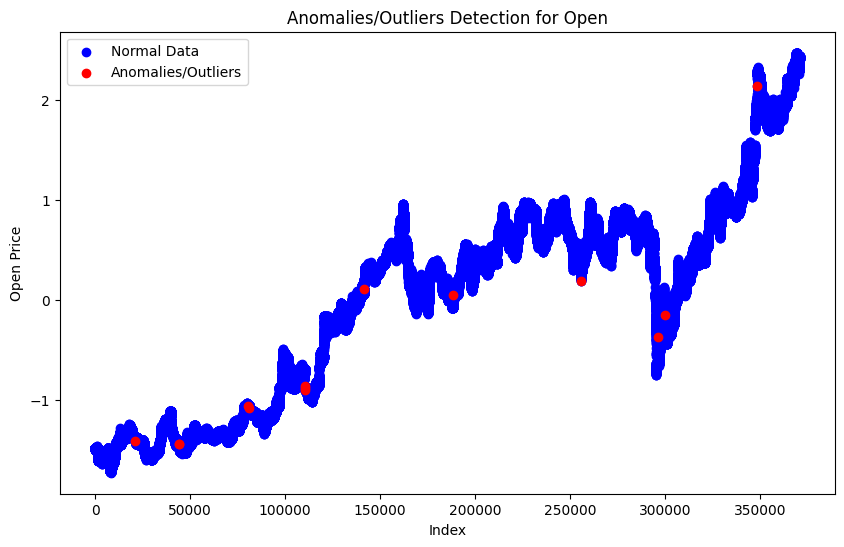

Outliers for high: [21202, 44035, 44188, 80714, 80750, 110490, 110491, 110501, 141615, 188536, 255675, 296241, 299587, 348361]


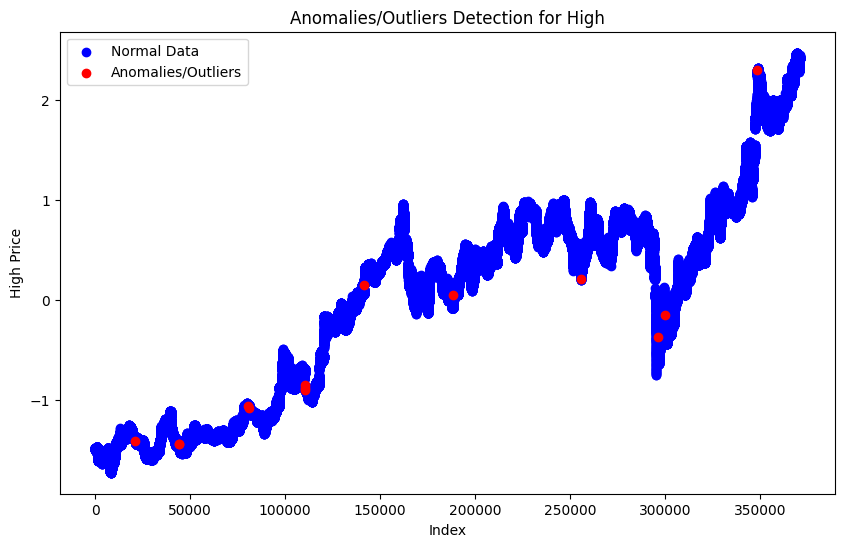

Outliers for low: [21202, 44035, 44188, 80714, 80750, 110490, 110491, 110501, 141615, 188536, 255675, 296241, 299587, 348361]


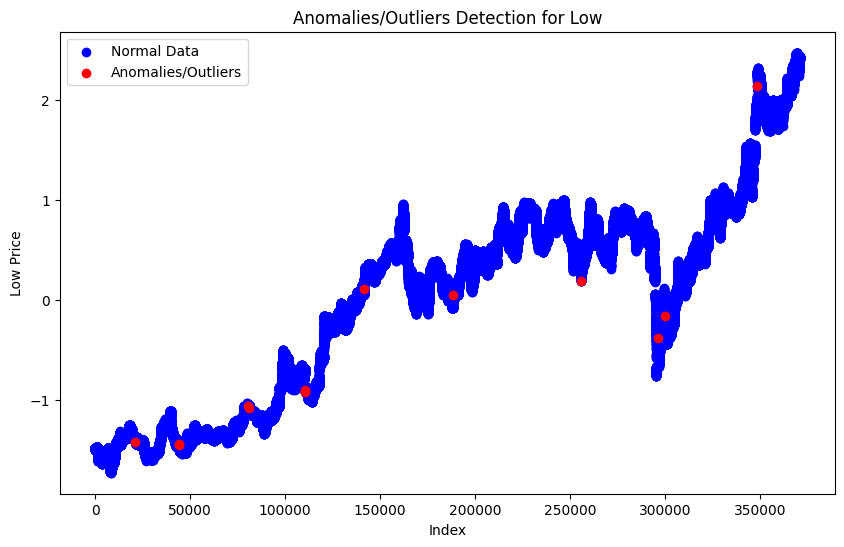

Outliers for close: [21202, 44035, 44188, 80714, 80750, 110490, 110491, 110501, 141615, 188536, 255675, 296241, 299587, 348361]


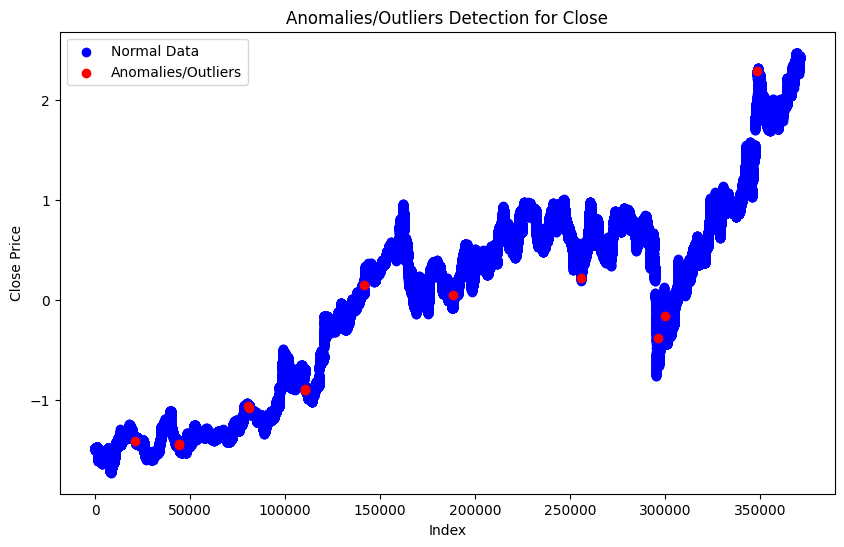

Outliers for volume: [21202, 44035, 44188, 80714, 80750, 110490, 110491, 110501, 141615, 188536, 255675, 296241, 299587, 348361]


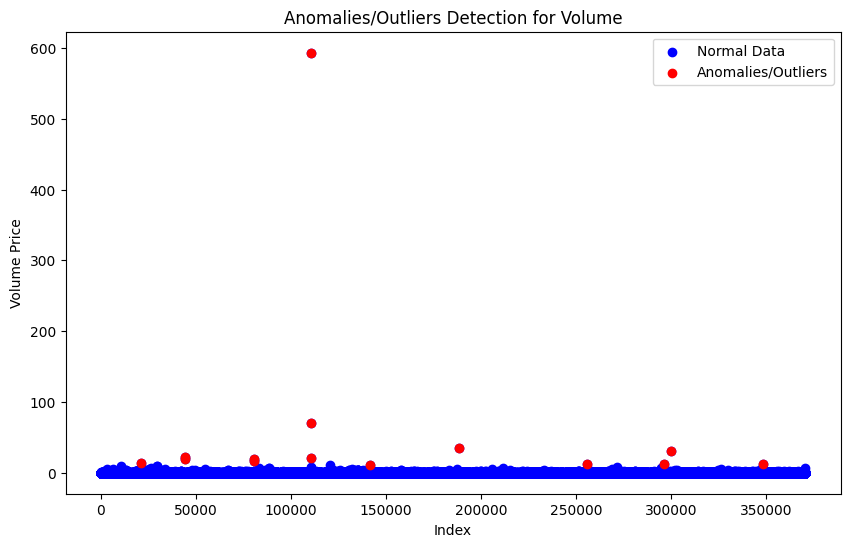

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs_clean_data.csv")

# Selecting numerical features for anomaly detection
features = ['open', 'high', 'low', 'close', 'volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 5

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn_model.fit(data[features])

# Calculate distances to k nearest neighbors for each data point
distances, indices = knn_model.kneighbors()

# Calculate average distance to k nearest neighbors for each data point
average_distances = distances.mean(axis=1)

# Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
threshold = 2.0

# Identify outliers for each feature based on the threshold
outliers_indices = {feature: data.index[average_distances > threshold].tolist() for feature in features}

# Print outliers and plot graphs
for feature in features:
    print(f"Outliers for {feature}: {outliers_indices[feature]}")

    # Plotting anomalies/outliers for the feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[feature], label='Normal Data', color='blue')
    plt.scatter(outliers_indices[feature], data.loc[outliers_indices[feature]][feature], label='Anomalies/Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(feature.capitalize() + ' Price')
    plt.title('Anomalies/Outliers Detection for ' + feature.capitalize())
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs_clean_data.csv",nrows=10000)

# Selecting numerical features for anomaly detection
features = ['open']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 5

# Initialize dictionary to store outlier indices for each feature
outliers_indices = {feature: [] for feature in features}

# Iterate through the first 1000 data points
for idx in range(50000):
    # Exclude current data point
    current_data = data.drop(index=idx)

    # Fit KNN model for the current data point
    knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
    knn_model.fit(current_data[features])

    # Calculate distances to k nearest neighbors for the current data point
    distances, _ = knn_model.kneighbors([data.loc[idx, features]])

    # Calculate average distance to k nearest neighbors for the current data point
    average_distance = distances.mean()

    # Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
    threshold = 2.0

    # Identify outliers for each feature based on the threshold
    for feature in features:
        if average_distance > threshold:
            outliers_indices[feature].append(idx)

# Print outliers and plot graphs
for feature in features:
    print(f"Outliers for {feature}: {outliers_indices[feature]}")

    # Plotting anomalies/outliers for the feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[feature], label='Normal Data', color='blue')
    plt.scatter(outliers_indices[feature], data.loc[outliers_indices[feature]][feature], label='Anomalies/Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(feature.capitalize() + ' Price')
    plt.title('Anomalies/Outliers Detection for ' + feature.capitalize())
    plt.legend()
    plt.show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.p

KeyError: '[10000] not found in axis'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs_clean_data.csv")

# Selecting numerical features for anomaly detection
features = ['open', 'high', 'low', 'close', 'volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 2

# Initialize dictionary to store outlier indices for each feature
outliers_indices = {feature: [] for feature in features}

# Iterate through each data point
for idx in range(len(data)):
    # Exclude current data point
    current_data = data.drop(index=idx)

    # Fit KNN model for the current data point
    knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
    knn_model.fit(current_data[features])

    # Calculate distances to k nearest neighbors for the current data point
    distances, _ = knn_model.kneighbors([data.loc[idx, features]])

    # Calculate average distance to k nearest neighbors for the current data point
    average_distance = distances.mean()

    # Set a threshold for anomaly detection (you can adjust this threshold based on your dataset)
    threshold = 2.0

    # Identify outliers for each feature based on the threshold
    for feature in features:
        if average_distance > threshold:
            outliers_indices[feature].append(idx)

# Print outliers and plot graphs
for feature in features:
    print(f"Outliers for {feature}: {outliers_indices[feature]}")

    # Plotting anomalies/outliers for the feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[feature], label='Normal Data', color='blue')
    plt.scatter(outliers_indices[feature], data.loc[outliers_indices[feature]][feature], label='Anomalies/Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(feature.capitalize() + ' Price')
    plt.title('Anomalies/Outliers Detection for ' + feature.capitalize())
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

KeyboardInterrupt: 

In [ ]:
!pip install scipy.spatial

ERROR: Could not find a version that satisfies the requirement scipy.spatial (from versions: none)
ERROR: No matching distribution found for scipy.spatial


In [ ]:
!pip install cdist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 6.3 MB/s eta 0:00:00


[2.0]
[2.0, 3.25]
[2.0, 3.25, 0.0]
[2.0, 3.25, 0.0, 7786.5]
[0.0, 2.0, 3.25, 7786.5]
1947.9375
[2.0]
[2.0, 5.25]
[2.0, 5.25, 2.0]
[2.0, 5.25, 2.0, 7784.5]
[2.0, 2.0, 5.25, 7784.5]
1948.4375
[3.25]
[3.25, 5.25]
[3.25, 5.25, 3.25]
[3.25, 5.25, 3.25, 7789.75]
[3.25, 3.25, 5.25, 7789.75]
1950.375
[0.0]
[0.0, 2.0]
[0.0, 2.0, 3.25]
[0.0, 2.0, 3.25, 7786.5]
[0.0, 2.0, 3.25, 7786.5]
1947.9375
[7786.5]
[7786.5, 7784.5]
[7786.5, 7784.5, 7789.75]
[7786.5, 7784.5, 7789.75, 7786.5]
[7784.5, 7786.5, 7786.5, 7789.75]
7786.8125


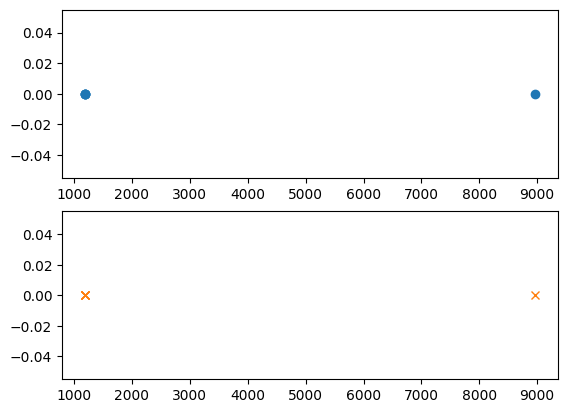

In [ ]:
# Anomility Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def detect_anomility(data_array, k=2, threshold = 1):
    k = k
    threshold = threshold
    datapoint = []
    anomility = []
    for i in range(len(data_array)):
        mean = 0
        distances = []
        for j in range(len(data_array)):
            if i == j: continue
            dist = data_array[j] - data_array[i]
            distances.append(abs(dist))
            print(distances)

        distances.sort()
        kmin = distances[0: k]
        print(kmin)
        for j in range(len(kmin)):
            mean += kmin[j]
        mean = mean / len(kmin)
        print(mean)
        if mean > 1: anomility.append(data_array[i])
        else: datapoint.append(data_array[i])

    return datapoint, anomility
## Example Dataset
data = pd.DataFrame({
    "name": ["Mohan", "Maria", "Sakib", "Tao", "Virat", "Khushbu", "Mitr", "Selena", "John", "Imran", "Josa", "Deepika", "Joseph", "Binod", "Gul", "Johnson", "Donald", "Aamir", "Ken", "Liu"],
    "height": [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6.0, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]
})

d = list(data["height"])
datapoint, anomility = detect_anomility(d)
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(d, np.zeros_like(d) + val, 'o')  # ploting the original data
plt.subplot(212)
plt.plot(datapoint, np.zeros_like(datapoint) + val, 'o') # ploting the original data
plt.plot(anomility, np.zeros_like(anomility) + val, 'x') # plotting anomilities
## Selected Dataset
df = pd.read_csv('/content/tcs_clean_data.csv')
d2 = list(df.T[0])
name, d2 = d2[0], d2[1: ]
datapoint2, anomility2 = detect_anomility(d2, k=4)
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(d2, np.zeros_like(d2) + val, 'o')  # ploting the original data
plt.subplot(212)
plt.plot(datapoint2, np.zeros_like(datapoint2) + val, 'o') # ploting the original data
plt.plot(anomility2, np.zeros_like(anomility2) + val, 'x') # plotting anomilities


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_anomaly(data_array, k=2, threshold=threshold):
    outliers = []
    for i in range(len(data_array)):
        distances = []
        for j in range(len(data_array)):
            if i == j:
                continue
            dist = abs(data_array[j] - data_array[i])
            distances.append(dist)

        distances.sort()
        k_nearest_distances = distances[:k]
        mean_distance = sum(k_nearest_distances) / k
        if mean_distance > threshold:
            outliers.append((i, data_array[i]))

    return outliers

# Load Dataset
df = pd.read_csv('/content/tcs_clean_data.csv',nrows=100000)
columns = [ 'volume']

# Calculate descriptive statistics
statistics = df.describe()

# Display descriptive statistics
print(statistics)

# Ask for threshold from user
threshold = float(input("Enter threshold for anomaly detection: "))

# Iterate over columns and detect anomalies
for col in columns:
    data = df[col].values
    outliers = detect_anomaly(data, k=4, threshold=threshold)

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), data, 'bo', label='Normal Data')
    for outlier in outliers:
        plt.plot(outlier[0], outlier[1], 'ro', label='Anomalies')
    plt.title(f'Anomaly Detection for {col.capitalize()}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Print outliers
    print(f"Outliers for {col.capitalize()}:")
    for outlier in outliers:
        print(f"Index: {outlier[0]}, Value: {outlier[1]}")

# Print count of anomalies
print("Number of anomalies detected:", len(outliers))


                open           high            low          close  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     1251.532537    1251.973871    1251.080507    1251.530717   
std        80.687412      80.745391      80.630424      80.695531   
min      1076.500000    1078.030000    1076.500000    1076.750000   
25%      1203.230000    1203.530000    1202.850000    1203.230000   
50%      1242.730000    1243.050000    1242.450000    1242.730000   
75%      1293.500000    1294.000000    1293.000000    1293.500000   
max      1626.650000    1629.450000    1624.300000    1627.000000   

             volume  
count  1.000000e+05  
mean   6.009615e+03  
std    1.970184e+04  
min    0.000000e+00  
25%    1.420000e+03  
50%    2.840000e+03  
75%    5.964000e+03  
max    2.170390e+06  


               open          high           low         close         volume
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000
mean    1145.226243   1145.648144   1144.787544   1145.214463    7780.358200
std       27.045602     27.024017     27.035788     27.039198   15344.125748
min     1076.500000   1078.030000   1076.500000   1076.750000      14.000000
25%     1130.545000   1131.130000   1130.000000   1130.530000    2124.000000
50%     1144.640000   1145.000000   1144.450000   1144.630000    4119.000000
75%     1166.000000   1166.450000   1165.700000   1166.000000    8471.000000
max     1194.980000   1194.980000   1192.650000   1193.500000  503078.000000
Enter threshold for anomaly detection: 300000


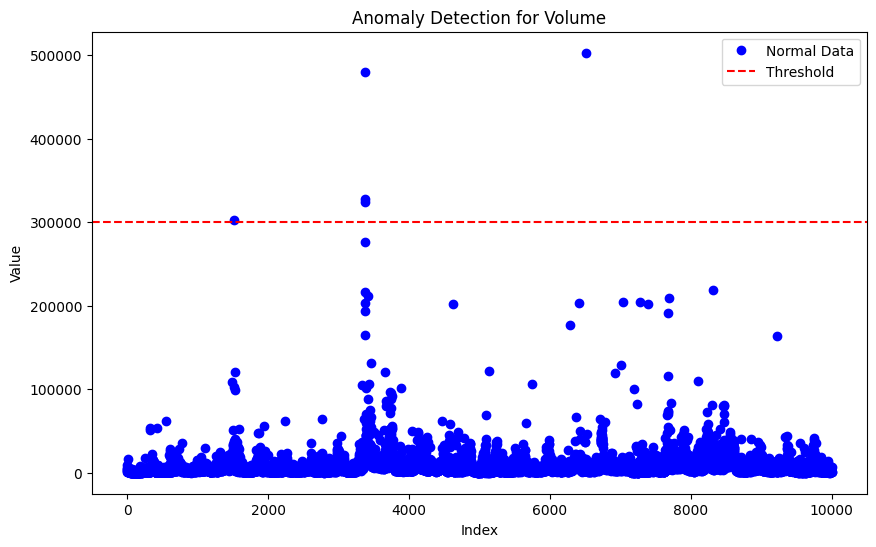

Outliers for Volume:
Number of anomalies detected: 0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_anomaly(data_array, k=2, threshold=1.0):
    outliers = []
    for i in range(len(data_array)):
        distances = []
        for j in range(len(data_array)):
            if i == j:
                continue
            dist = abs(data_array[j] - data_array[i])
            distances.append(dist)

        distances.sort()
        k_nearest_distances = distances[:k]
        mean_distance = sum(k_nearest_distances) / k
        if mean_distance > threshold:
            outliers.append((i, data_array[i]))

    return outliers

# Load Dataset
df = pd.read_csv('/content/tcs_clean_data.csv',nrows=10000) #change the path
columns = ['volume']

# Calculate descriptive statistics
statistics = df.describe()

# Display descriptive statistics
print(statistics)

# Ask for threshold from user
threshold = float(input("Enter threshold for anomaly detection: "))

# Iterate over columns and detect anomalies
for col in columns:
    data = df[col].values
    outliers = detect_anomaly(data, k=4, threshold=threshold)

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), data, 'bo', label='Normal Data')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    for outlier in outliers:
        plt.plot(outlier[0], outlier[1], 'ro', label='Anomalies')
    plt.title(f'Anomaly Detection for {col.capitalize()}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Print outliers
    print(f"Outliers for {col.capitalize()}:")
    for outlier in outliers:
        print(f"Index: {outlier[0]}, Value: {outlier[1]}")

# Print count of anomalies
print("Number of anomalies detected:", len(outliers))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
  """
  Calculate the Euclidean distance between two data points.

  Args:
      p1: A numpy array representing the first data point.
      p2: A numpy array representing the second data point.

  Returns:
      The Euclidean distance between p1 and p2.
  """
  return np.sqrt(np.sum((p1 - p2) ** 2))

def knn_outlier_detection(data, k=5, distance_metric=euclidean_distance):
  """
  Identify outliers in a dataset using K-Nearest Neighbors (KNN).

  Args:
      data: A numpy array containing the data points.
      k: The number of neighbors to consider for each data point (default: 5).
      distance_metric: A function that calculates the distance between two data points (default: Euclidean distance).

  Returns:
      A list of outlier indices.
  """
  n_samples, n_features = data.shape
  distances = np.zeros((n_samples, n_samples))

  # Calculate distances between all data points
  for i in range(n_samples):
    for j in range(i + 1, n_samples):
      distances[i, j] = distance_metric(data[i], data[j])
      distances[j, i] = distances[i, j]  # Symmetric distance matrix

  # Find k-nearest neighbors for each data point (excluding itself)
  knn_indices = np.argsort(distances, axis=1)[:, 1:k+1]

  # Calculate average distance to k-nearest neighbors for each data point
  avg_distances = np.mean(distances[np.arange(n_samples)[:, None], knn_indices], axis=1)

  # Define a threshold for outlier detection (e.g., a multiple of the standard deviation)
  threshold = 3 * np.std(avg_distances)

  # Identify outliers as data points with average distance exceeding the threshold
  outlier_indices = np.where(avg_distances > threshold)[0]

  return outlier_indices

# Load data from CSV
# Update with your path
df = pd.read_csv("/content/tcs_clean_data.csv",nrows=10000)

# Select columns for analysis
columns_to_analyze = [ 'volume']  # Replace with your desired columns

# Combine data from selected columns into a NumPy array
data = df[columns_to_analyze].to_numpy()

# Detect outliers using KNN with k=3 and Euclidean distance
outlier_indices = knn_outlier_detection(data, k=3)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label='Normal Data')  # Assuming data has two columns

# Plot outliers in a different color
if len(outlier_indices) > 0:
  outlier_data = data[outlier_indices]
  plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', marker='x', label='Outliers')

plt.title(f'Outlier Detection using KNN (k=3) on {", ".join(columns_to_analyze)}')
plt.xlabel(columns_to_analyze[0])
plt.ylabel(columns_to_analyze[1])
plt.legend()
plt.show()

# Print outlier details (optional)
if len(outlier_indices) > 0:
  print("Outlier indices:")
  for idx in outlier_indices:
    print(f"\tIndex: {idx}, Data point:", data[idx])
else:
  print("No outliers detected based on KNN with k=3 and Euclidean distance.")


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd

# Load and calculate differences (same as before)
data = pd.read_csv("/content/tcs_clean_data.csv")
data["Volume Diff"] = data["volume"].diff()
data.fillna(method="ffill", inplace=True)

# Transpose the DataFrame
distance_table = data[[ "Volume Diff"]].T  # Select relevant columns and transpose

# Display the table
print(distance_table)


             0       1       2       3       4       5       6       7       \
Volume Diff     NaN -3432.0 -4172.0   274.0  1846.0  1050.0 -1248.0 -1812.0   

             8       9       ...  370536   370537   370538  370539  370540  \
Volume Diff  1568.0 -1892.0  ...  -977.0  56168.0 -75511.0  -149.0  3771.0   

             370541  370542  370543  370544   370545  
Volume Diff  -345.0 -4475.0  1461.0  8117.0 -11008.0  

[1 rows x 370546 columns]


In [ ]:
import pandas as pd

# Load and calculate differences (same as before)
data = pd.read_csv("/content/tcs_clean_data.csv")
data["Volume Diff"] = data["volume"].diff()
data.fillna(method="ffill", inplace=True)

# Transpose the DataFrame (showing Volume Diff vertically)
distance_table = data[['Volume Diff']].T

# Save the table to a CSV file
distance_table.to_csv('volume_differences.csv', index=False)

print(distance_table)  # Display the table for reference



             0       1       2       3       4       5       6       7       \
Volume Diff     NaN -3432.0 -4172.0   274.0  1846.0  1050.0 -1248.0 -1812.0   

             8       9       ...  370536   370537   370538  370539  370540  \
Volume Diff  1568.0 -1892.0  ...  -977.0  56168.0 -75511.0  -149.0  3771.0   

             370541  370542  370543  370544   370545  
Volume Diff  -345.0 -4475.0  1461.0  8117.0 -11008.0  

[1 rows x 370546 columns]


IndexError: index 110490 is out of bounds for axis 0 with size 4

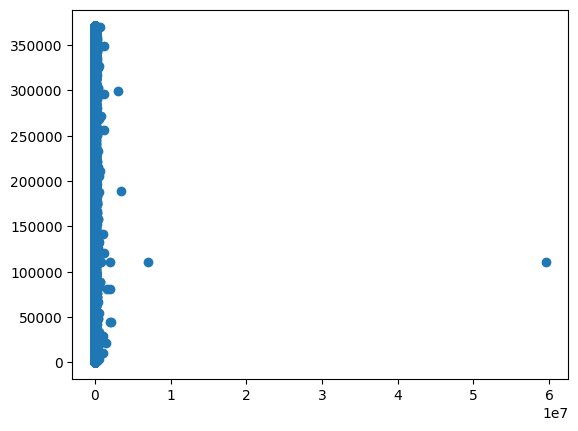

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd  # For handling missing values

# Load your CSV data using pandas to handle missing values
try:
  # Attempt to read CSV with data types (modify data types if needed)
  data = pd.read_csv("/content/tcs_clean_data.csv", dtype={'timestamp': str, 'open': float, 'high': float, 'low': float, 'close': float, 'volume': float})
except pd.errors.ParserError:
  # If data type specification fails, read generically and handle missing values later
  data = pd.read_csv("/content/tcs_clean_data.csv")
  data.dropna(subset=['volume'], inplace=True)  # Drop rows with missing volume data

# Extract the volume column
volume_data = data["volume"]

# Convert Series to NumPy array for scaling
volume_data = volume_data.to_numpy()

# Scale the volume data (optional)
scaler = StandardScaler()
volume_data_scaled = scaler.fit_transform(volume_data.reshape(-1, 1))

# Define the number of nearest neighbors
k = 2

# Create a NearestNeighbors object
nbrs = NearestNeighbors(n_neighbors=k)

# Fit the NearestNeighbors model to the volume data
nbrs.fit(volume_data_scaled)

# Calculate the distances between each data point and its k nearest neighbors
distances, indices = nbrs.kneighbors(volume_data_scaled)

# Identify outliers
threshold = 3  # You can adjust this value based on your data
anomalies = []
for i, distance in enumerate(distances[:, -1]):
    if distance > threshold:
        anomalies.append(i)

# Filter valid anomalies within data range
valid_anomalies = [i for i in anomalies if i < len(volume_data)]

# Visualization
plt.scatter(volume_data, np.arange(len(volume_data)))  # Plot all data points
plt.scatter(volume_data[valid_anomalies], np.arange(len(valid_anomalies))[valid_anomalies], c='red', label='Anomalies')  # Plot anomalies in red
plt.xlabel("Volume")
plt.ylabel("Data point index")
plt.title("Volume vs. Data Point Index (Anomalies in Red)")
plt.legend()
plt.show()

# Print the anomaly indices (optional)
print("Anomaly indices in your CSV:", valid_anomalies)


Outliers for volume: [0, 1, 4, 5, 6, 8, 10, 11, 15, 18, 19, 20, 21, 22, 25, 27, 31, 47, 74, 97]


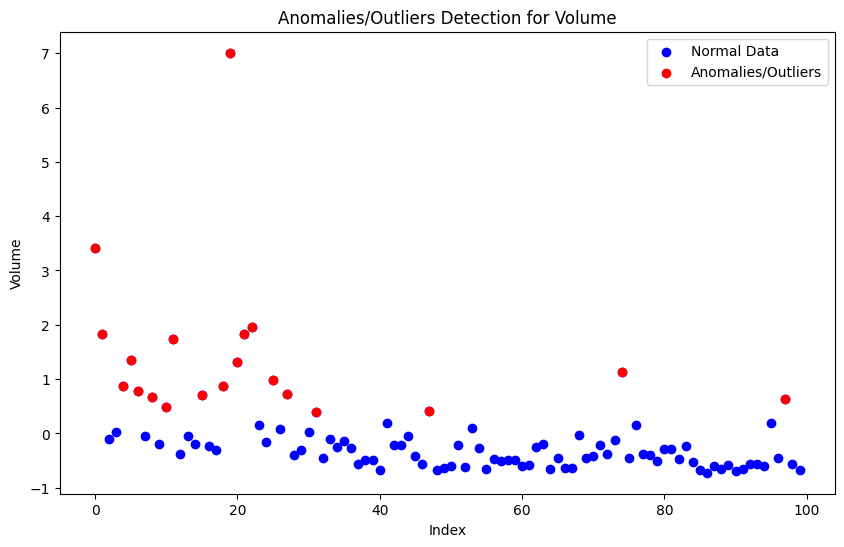

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv("/content/tcs_clean_data.csv",nrows=100)

# Selecting numerical features for anomaly detection
features = ['volume']

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Number of neighbors for KNN algorithm
k = 16

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn_model.fit(data[features])

# Calculate distances to k nearest neighbors for each data point
distances, indices = knn_model.kneighbors()

# Calculate average distance to k nearest neighbors for each data point
average_distances = distances.mean(axis=1)

# Assuming you want to identify outliers for each feature without a threshold
outliers_indices = {feature: data.index[average_distances > average_distances.mean()].tolist() for feature in features}

# Print outliers and plot graphs
for feature in features:
    print(f"Outliers for {feature}: {outliers_indices[feature]}")

    # Plotting anomalies/outliers for the feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[feature], label='Normal Data', color='blue')
    plt.scatter(outliers_indices[feature], data.loc[outliers_indices[feature]][feature], label='Anomalies/Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(feature.capitalize())
    plt.title('Anomalies/Outliers Detection for ' + feature.capitalize())
    plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier


# Sample imbalanced dataset (modify as needed)
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.5], [4, 5], [7, 7], [7.5, 7.2],
    [3, 4], [5, 4], [6, 5], [1.2, 3.4], [3.5, 4.2], [5.8, 5.1], [6.8, 6.2], [8.2, 7.8],
    [2, 5], [4, 7], [6, 8], [2.5, 6], [4.5, 8], [7, 9], [8.5, 9.2], [2.8, 6.4]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

# Function to visualize data (before and after SMOTE)
def visualize_data(X, y, title):
    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, label='Original Data')
    plt.title(title)
    plt.legend()
    plt.show()

# Print class distribution before SMOTE
print("Class distribution before SMOTE:")
print(Counter(y))

# Define k for k-nearest neighbors
k = 3

# Create KNN classifier (not used for SMOTE, but for clarity)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)


# Function to perform SMOTE oversampling
def smote(X, y, k):
    X_new = X.copy()
    y_new = y.copy()

    for i, x in enumerate(X):
        if y[i] == 1:  # Check for minority class (change index if needed)
            # Find k nearest neighbors
            neighbors, distances = knn.kneighbors(x.reshape(1, -1), return_distance=True)

            # Handle cases with fewer than k neighbors
            num_neighbors = len(neighbors[0])
            if num_neighbors < k:
                continue  # Skip if not enough neighbors

            # Randomly choose one neighbor
            nn_index = np.random.choice(num_neighbors)

            # Calculate difference between sample and neighbor
            diff = (neighbors[0][nn_index] - x)

            # Generate synthetic samples between x and neighbor
            num_synth_samples = int(np.random.rand() * 5)  # Randomly generate up to 5 samples

            for _ in range(num_synth_samples):
                # Generate random factor between 0 and 1
                rand_factor = np.random.rand()

                # Create synthetic sample
                synthetic_sample = x + rand_factor * diff

                # Add synthetic sample to data
                X_new = np.vstack((X_new, synthetic_sample))
                y_new = np.append(y_new, 1)

    return X_new, y_new


# Apply SMOTE
X_smote, y_smote = smote(X, y, k)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_smote))

# Visualize data before and after SMOTE
visualize_data(X, y, "Data Before SMOTE")
visualize_data(X_smote, y_smote, "Data After SMOTE")


SyntaxError: invalid syntax (<ipython-input-29-2ca6b0ff4e51>, line 72)

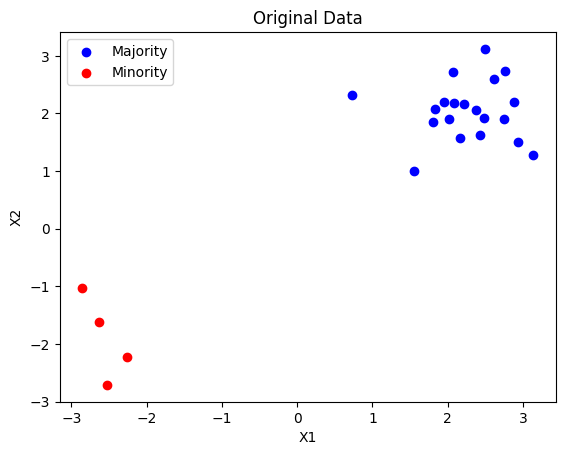

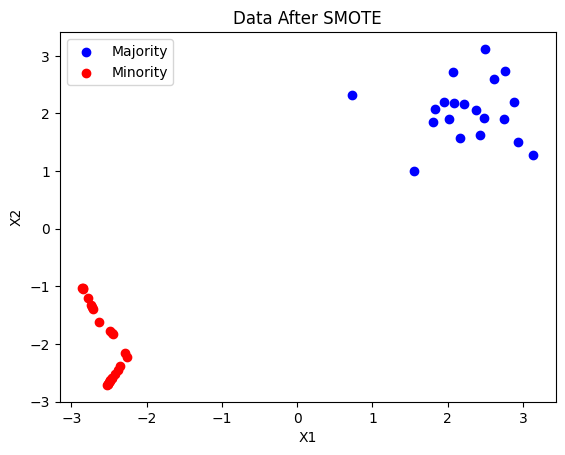

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data
def generate_data():
    np.random.seed(0)
    # Majority class
    X_majority = np.random.randn(20, 2) * 0.5 + 2
    y_majority = np.zeros(20)
    # Minority class
    X_minority = np.random.randn(4, 2) * 0.5 - 2
    y_minority = np.ones(4)

    X = np.concatenate([X_majority, X_minority], axis=0)
    y = np.concatenate([y_majority, y_minority], axis=0)

    return X, y

# Plot data
def plot_data(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Majority', color='blue')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Minority', color='red')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# Implement SMOTE
def smote(X, y, k=3, oversampling_ratio=1):
    # Find minority class indices
    minority_indices = np.where(y == 1)[0]

    # Initialize nearest neighbors
    nn = NearestNeighbors(n_neighbors=k+1)
    nn.fit(X)

    # Generate synthetic samples
    synthetic_samples = []
    for minority_index in minority_indices:
        # Find k nearest neighbors
        nn_indices = nn.kneighbors([X[minority_index]], return_distance=False)[0][1:]
        # Randomly select one of the neighbors
        selected_neighbor = X[np.random.choice(nn_indices)]
        # Generate synthetic sample
        synthetic_sample = X[minority_index] + np.random.rand(oversampling_ratio, 1) * (selected_neighbor - X[minority_index])
        synthetic_samples.extend(synthetic_sample)

    synthetic_samples = np.array(synthetic_samples)
    synthetic_labels = np.ones(len(synthetic_samples))

    return synthetic_samples, synthetic_labels

# Main function
def main():
    # Generate data
    X, y = generate_data()
    # Plot original data
    plot_data(X, y, 'Original Data')

    # Apply SMOTE
    synthetic_samples, synthetic_labels = smote(X, y, k=3, oversampling_ratio=5)
    # Combine original and synthetic data
    X_resampled = np.vstack((X, synthetic_samples))
    y_resampled = np.hstack((y, synthetic_labels))

    # Plot resampled data
    plot_data(X_resampled, y_resampled, 'Data After SMOTE')

if __name__ == "__main__":
    main()


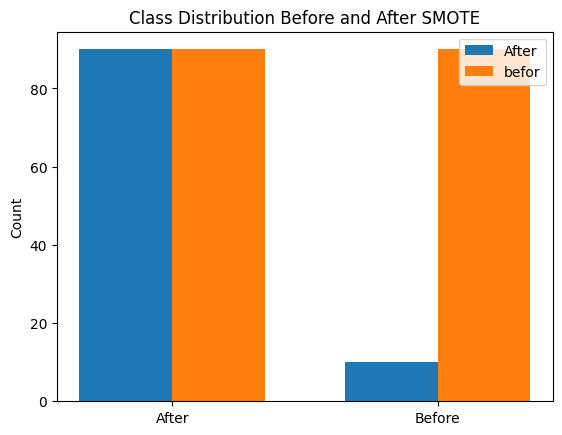

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Hand-code an imbalanced dataset
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.concatenate([np.zeros(90), np.ones(10)])  # Imbalanced dataset

# Count class distribution before SMOTE
class_distribution_before = Counter(y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Count class distribution after SMOTE
class_distribution_after = Counter(y_res)

# Plot bar graph
labels = ['After', 'Before']
before_values = [class_distribution_before[0], class_distribution_before[1]]
after_values = [class_distribution_after[0], class_distribution_after[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_values, width, label='After')
rects2 = ax.bar(x + width/2, after_values, width, label='befor')

ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
%pip install imbalanced-learn

y labels before oversampling
Counter({0: 562, 1: 438})


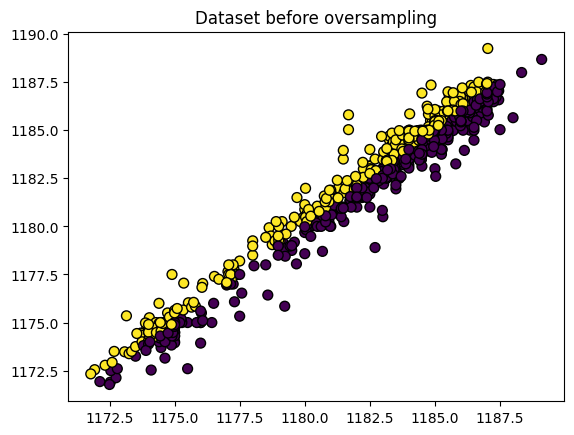

Mean AUC before oversampling: 0.907
y labels after oversampling
Counter({0: 562, 1: 562})


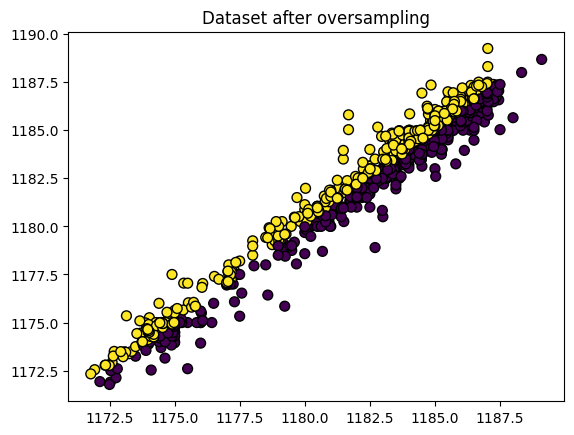

Mean AUC after oversampling: 0.926


In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Load your dataset
# Assuming your dataset is in a CSV file named 'tcs_clean_data.csv'
df = pd.read_csv('/content/tcs_clean_data.csv', nrows=1000)

# Define a binary target variable indicating whether the closing price is higher than the opening price
df['target'] = np.where(df['close'] > df['open'], 1, 0)

# Assign features and target variable
X = df[['open', 'close']].values
y = df['target'].values

# Checking class distribution before oversampling
labels = Counter(y)
print("y labels before oversampling")
print(labels)

# Visualizing dataset before oversampling
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k")
plt.title("Dataset before oversampling")
plt.show()

# Initializing the decision tree model
model = DecisionTreeClassifier()

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Performing cross-validation without oversampling
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC before oversampling: %.3f" % np.mean(result))

# Oversampling using SMOTE
over = SMOTE()
X_resampled, y_resampled = over.fit_resample(X, y)

# Checking class distribution after oversampling
labels = Counter(y_resampled)
print("y labels after oversampling")
print(labels)

# Visualizing dataset after oversampling
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], marker="o", c=y_resampled, s=50, edgecolor="k")
plt.title("Dataset after oversampling")
plt.show()

# Cross-validation after oversampling
result = cross_val_score(model, X_resampled, y_resampled, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC after oversampling: %.3f" % np.mean(result))

y labels before oversampling
Counter({0: 10636, 1: 9364})


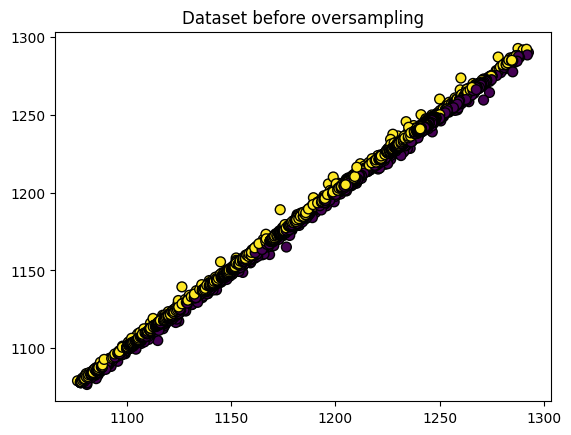

Mean AUC before oversampling: 0.922
y labels after oversampling
Counter({0: 10636, 1: 10636})


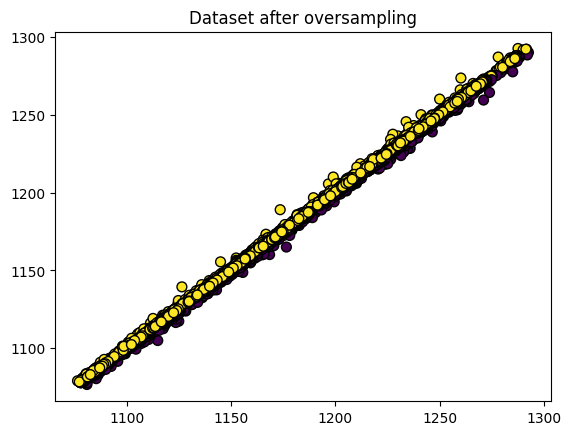

Mean AUC after oversampling: 0.929


In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Load your dataset
# Assuming your dataset is in a CSV file named 'tcs_clean_data.csv'
df = pd.read_csv('/content/exp 8 dataset.csv', nrows=20000)

# Define a binary target variable indicating whether the closing price is higher than the opening price
df['target'] = np.where(df['close'] > df['open'], 1, 0)

# Assign features and target variable
X = df[['open', 'close']].values
y = df['target'].values

# Checking class distribution before oversampling
labels = Counter(y)
print("y labels before oversampling")
print(labels)

# Visualizing dataset before oversampling
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k")
plt.title("Dataset before oversampling")
plt.show()

# Initializing the decision tree model
model = DecisionTreeClassifier()

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Performing cross-validation without oversampling
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC before oversampling: %.3f" % np.mean(result))

# Oversampling using SMOTE
over = SMOTE()
X_resampled, y_resampled = over.fit_resample(X, y)

# Checking class distribution after oversampling
labels = Counter(y_resampled)
print("y labels after oversampling")
print(labels)

# Visualizing dataset after oversampling
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], marker="o", c=y_resampled, s=50, edgecolor="k")
plt.title("Dataset after oversampling")
plt.show()

# Cross-validation after oversampling
result = cross_val_score(model, X_resampled, y_resampled, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC after oversampling: %.3f" % np.mean(result))

y labels before oversampling
Counter({0: 10636, 1: 9364})


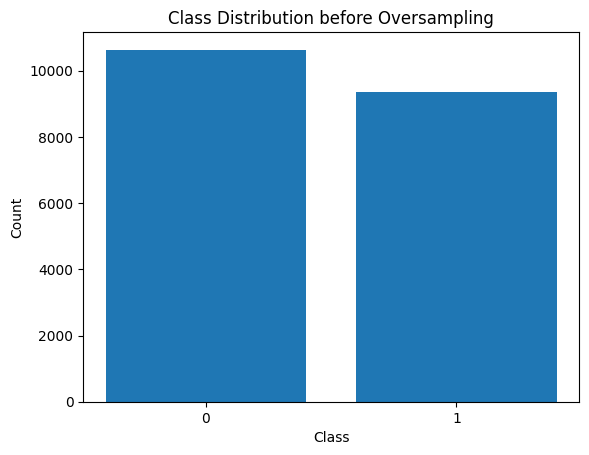

Mean AUC before oversampling: 0.922
y labels after oversampling
Counter({0: 10636, 1: 10636})


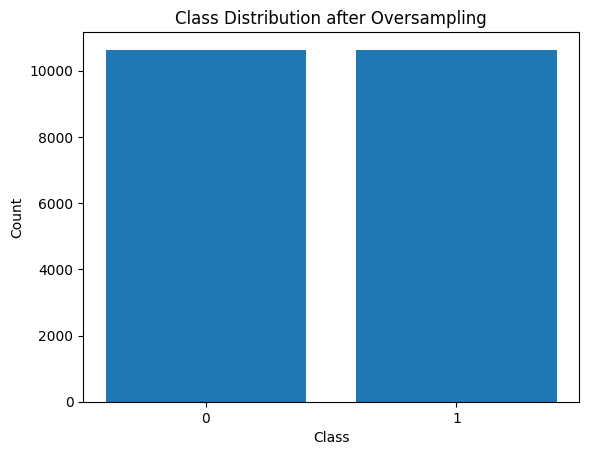

Mean AUC after oversampling: 0.929


In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Load your dataset
# Assuming your dataset is in a CSV file named 'tcs_clean_data.csv'
df = pd.read_csv('/content/exp 8 dataset.csv', nrows=20000)

# Define a binary target variable indicating whether the closing price is higher than the opening price
df['target'] = np.where(df['close'] > df['open'], 1, 0)

# Assign features and target variable
X = df[['open', 'close']].values
y = df['target'].values

# Checking class distribution before oversampling
labels_before = Counter(y)
print("y labels before oversampling")
print(labels_before)

# Visualizing class distribution before oversampling
plt.bar(labels_before.keys(), labels_before.values())
plt.title("Class Distribution before Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

# Initializing the decision tree model
model = DecisionTreeClassifier()

# Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Performing cross-validation without oversampling
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC before oversampling: %.3f" % np.mean(result))

# Oversampling using SMOTE
over = SMOTE()
X_resampled, y_resampled = over.fit_resample(X, y)

# Checking class distribution after oversampling
labels_after = Counter(y_resampled)
print("y labels after oversampling")
print(labels_after)

# Visualizing class distribution after oversampling
plt.bar(labels_after.keys(), labels_after.values())
plt.title("Class Distribution after Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

# Cross-validation after oversampling
result = cross_val_score(model, X_resampled, y_resampled, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC after oversampling: %.3f" % np.mean(result))


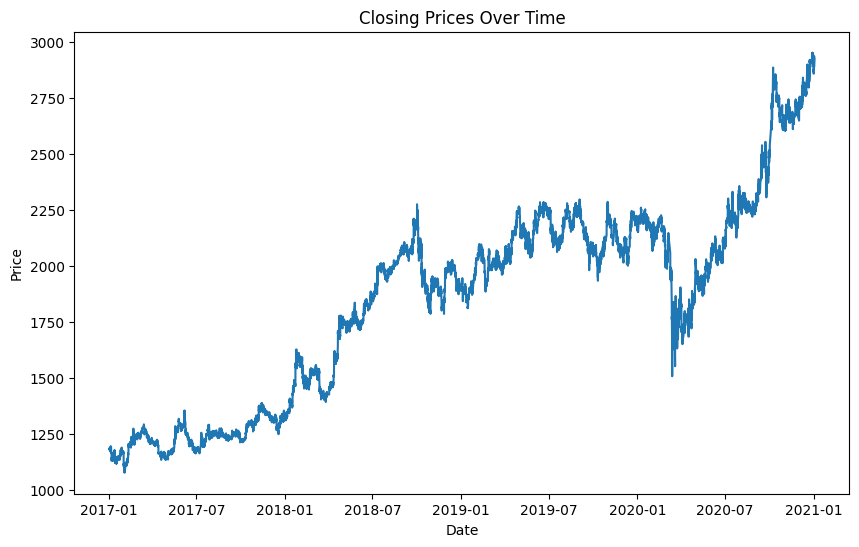

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

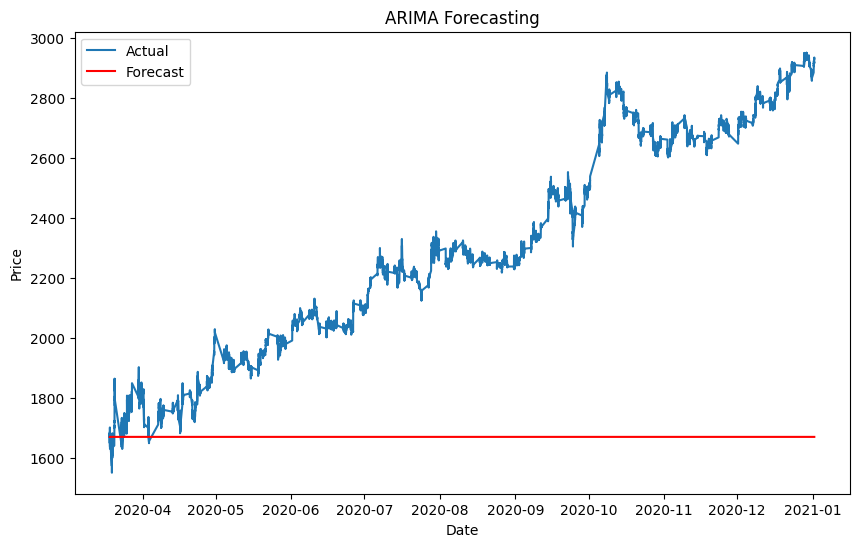

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('/content/tcs_clean_data.csv')

# Preprocess the data
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split the data
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Choose a forecasting model and train it
model = ARIMA(train['close'], order=(5,1,0))
model_fit = model.fit()

# Make forecasts
forecast = model_fit.forecast(steps=len(test))

# Visualize forecasts
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['close'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:               370545
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -731148.732
Date:                Thu, 28 Mar 2024   AIC                        1462305.463
Time:                        03:54:04   BIC                        1462348.754
Sample:                             0   HQIC                       1462317.873
                             - 370545                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0455      0.000   -121.105      0.000      -0.046      -0.045
ar.L2         -0.0230      0.001    -43.181      0.000      -0.024      -0.022
ma.L1         -1.0000   1.73e-05  -5.79e+04      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


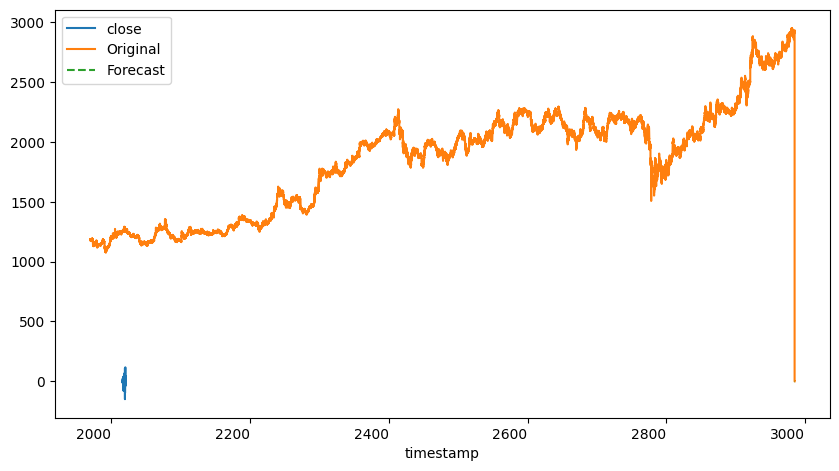

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load  CSV data
data = pd.read_csv("/content/tcs_clean_data.csv", index_col="timestamp", parse_dates=True)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found in data. Consider handling them before proceeding.")

# Select closing price (or other desired column)
data = data["close"]

# Check for stationarity (using differencing here as an example)
differenced_data = data.diff().dropna()  # Apply differencing and remove NaN introduced by differencing

# Plot differenced data to visually assess stationarity (optional)
differenced_data.plot(figsize=(10, 6))

# Explore ARIMA order using ACF and PACF plots (optional)
# ... (implementation for ACF/PACF plots left as an exercise)

# Define and fit the ARIMA model (replace p, d, q with your identified values)
model = ARIMA(differenced_data, order=(2, 1, 1))  # Adjust p, d, q based on your analysis
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Define number of periods to forecast
forecast_steps = 10

# Generate forecasts
forecast = model_fit.forecast(steps=forecast_steps)

# Combine forecasts with original data for visualization (optional)
forecast_data = pd.concat([data, forecast], ignore_index=True)
forecast_data.plot(label="Original", style="-")
forecast_data.iloc[-forecast_steps:].plot(label="Forecast", style="--")

# Display the plot
plt.legend()
plt.show()


<ipython-input-24-dc25164ec95f>:20: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  data_to_plot = data.loc[start_date:end_date]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:               370545
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -731148.732
Date:                Thu, 28 Mar 2024   AIC                        1462305.463
Time:                        05:11:42   BIC                        1462348.754
Sample:                             0   HQIC                       1462317.873
                             - 370545                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0455      0.000   -121.105      0.000      -0.046      -0.045
ar.L2         -0.0230      0.001    -43.181      0.000      -0.024      -0.022
ma.L1         -1.0000   1.73e-05  -5.79e+04      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


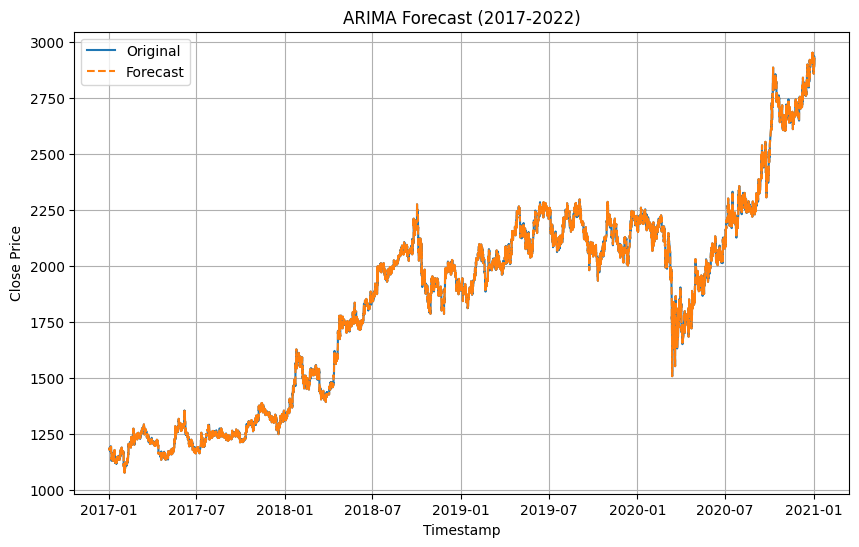

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data_path = '/content/tcs_clean_data.csv'

# Read data from CSV using pandas, assuming 'timestamp' is the index and 'close' is the desired column
data = pd.read_csv(data_path, index_col="timestamp", parse_dates=True)
data = data["close"]

# Check for stationarity (using differencing here as an example)
differenced_data = data.diff().dropna()  # Apply differencing and remove NaN introduced

# Define the start and end dates for plotting (years 2017 to 2022)
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2022-12-31")

# Filter data for the desired period
data_to_plot = data.loc[start_date:end_date]

# Define and fit the ARIMA model (replace p, d, q with your identified values)
model = ARIMA(differenced_data, order=(2, 1, 1))  # Adjust p, d, q based on your analysis
model_fit = model.fit()

# Print model summary (optional)
print(model_fit.summary())

# Define number of periods to forecast
forecast_steps = 3

# Generate forecasts
forecast = model_fit.forecast(steps=forecast_steps)

# Combine forecasts with original data for visualization
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq=data.index.inferred_freq)[1:]
forecast_data = pd.concat([data_to_plot, pd.Series(forecast, index=forecast_dates)], axis=0)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot.index, data_to_plot.values, label="Original", linestyle="-")
plt.plot(forecast_data.index, forecast_data.values, label="Forecast", linestyle="--")
plt.title("ARIMA Forecast (2017-2022)")
plt.xlabel("Timestamp")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from pandas import read_csv
import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    # Remove timezone information
    x = x.split('+')[0]
    return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')



# Assuming 'series' is a DataFrame with multiple columns
series = read_csv('/content/tcs_clean_data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select only one column (variable) for modeling
series = series.iloc[:, 0]

# Convert index to period
series.index = series.index.to_period('M')


# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<ipython-input-13-3b4f9205a1cd>:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/tcs_clean_data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=2243.450001, expected=2243.500000
predicted=2243.453276, expected=2240.300000
predicted=2240.462933, expected=2242.250000
predicted=2242.217438, expected=2243.000000
predicted=2242.940209, expected=2242.250000
predicted=2242.263954, expected=2244.800000
predicted=2244.658559, expected=2244.000000
predicted=2243.976364, expected=2244.300000
predicted=2244.270817, expected=2243.900000
predicted=2243.908795, expected=2245.500000
predicted=2245.411261, expected=2247.000000
predicted=2246.868695, expected=2247.800000
predicted=2247.688306, expected=2244.750000
predicted=2244.872005, expected=2244.800000
predicted=2244.857649, expected=2245.800000
predicted=2245.770435, expected=2247.950000
predicted=2247.810243, expected=2246.250000
predicted=2246.279508, expected=2246.150000
predicted=2246.170470, expected=2246.050000
predicted=2246.065983, expected=2243.500000
predicted=2243.656309, expected=2245.850000
predicted=2245.790846, expected=2246.650000
predicted=2246.574083, expected=

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data_path = '/content/tcs_clean_data.csv'

# Read data from CSV using pandas, assuming 'timestamp' is the index and 'close' is the desired column
data = pd.read_csv(data_path, index_col="timestamp", parse_dates=True)
data = data["close"]

# Split data into train and test sets (50% each)
train_size = int(len(data) * 0.5)
train_data, test_data = data[:train_size], data[train_size:]

# Define and fit the ARIMA model (replace p, d, q with your identified values)
model = ARIMA(train_data.diff().dropna(), order=(2, 1, 1))  # Adjust p, d, q based on your analysis
model_fit = model.fit()

# Define number of periods to forecast
forecast_steps = len(test_data)

# Generate forecasts
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate forecast dates based on the last date in the training data
last_date = train_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps, freq=train_data.index.freq)

# Combine forecasts with original data for visualization
forecast_data = pd.Series(forecast, index=forecast_dates)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label="Train", linestyle="-")
plt.plot(test_data.index, test_data.values, label="Test", linestyle="-")
plt.plot(forecast_data.index, forecast_data.values, label="Forecast", linestyle="--")
plt.title("ARIMA Forecast (Train-Test Split)")
plt.xlabel("Timestamp")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

OutOfBoundsDatetime: Cannot generate range with start=1546512720000000000 and periods=185273

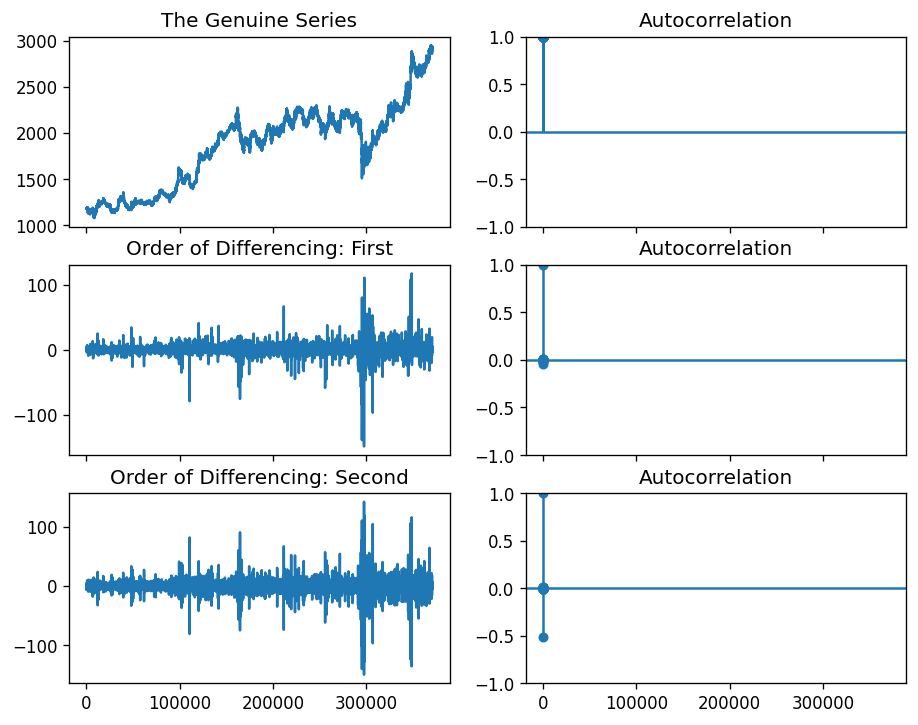

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Importing data
df = pd.read_csv('/content/tcs_clean_data.csv')

# Rename the 'volume' column to 'value'
df.rename(columns={'close': 'value'}, inplace=True)

# The Genuine Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['value'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(df['value'], ax=axes[0, 1])

# Order of Differencing: First
axes[1, 0].plot(df['value'].diff())
axes[1, 0].set_title('Order of Differencing: First')
plot_acf(df['value'].diff().dropna(), ax=axes[1, 1])

# Order of Differencing: Second
axes[2, 0].plot(df['value'].diff().diff())
axes[2, 0].set_title('Order of Differencing: Second')
plot_acf(df['value'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


In [ ]:
# Make sure you have the necessary libraries installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load your stock market data from the CSV file
csv_file_path = '/content/tcs_clean_data.csv'
stock_data = pd.read_csv(csv_file_path)

# Extract relevant columns (e.g., 'Close' price)
stock_prices = stock_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
stock_prices_scaled = scaler.fit_transform(stock_prices)

# Create sequences for training (use past 60 days' data to predict the next day)
sequence_length = 60
X_train, y_train = [], []
for i in range(sequence_length, len(stock_prices_scaled)):
    X_train.append(stock_prices_scaled[i - sequence_length:i, 0])
    y_train.append(stock_prices_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32)

# Prepare test data (similar to training data)
test_data = stock_prices[-sequence_length:]
test_data_scaled = scaler.transform(test_data)
X_test = []
for i in range(sequence_length, len(test_data_scaled)):
    X_test.append(test_data_scaled[i - sequence_length:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict stock prices
predicted_prices_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Print coefficient matrix (weights)
for layer in model.layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        if len(weights) > 0:
            print(f"Layer: {layer.name}")
            print(f"Coefficient Matrix (Weights): {weights[0]}")

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'][-len(predicted_prices):], stock_prices[-len(predicted_prices):], label='Actual Prices')
plt.plot(stock_data['Date'][-len(predicted_prices):], predicted_prices, label='Predicted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()

# Calculate accuracy (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(stock_prices[-len(predicted_prices):], predicted_prices)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Predict stock prices for a specific date (e.g., 2024-03-30)
specific_date = '2024-03-30'
specific_date_index = stock_data[stock_data['Date'] == specific_date].index[0]
specific_date_price = predicted_prices[specific_date_index]
print(f"Predicted closing price for {specific_date}: ${specific_date_price[0]:.2f}")


Epoch 1/2
11578/11578 [==============================] - 724s 62ms/step - loss: 8.7898e-05
Epoch 2/2
11578/11578 [==============================] - 699s 60ms/step - loss: 4.4542e-06


IndexError: tuple index out of range